# Environment setup

In [260]:
#Import packages
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import rtree
import fiona
import shapely
from shapely.validation import make_valid
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as cx
import ee
import geemap
import geemap.foliumap as geemapf
import geetools
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio.enums import Resampling
from rasterio.warp import calculate_default_transform, reproject, Resampling
import affine
import wget
import zipfile
import datetime
import pyinaturalist
from scipy import ndimage
import urllib
import requests
import json
import geojson
import rasterstats
import glob 
from geo_northarrow import add_north_arrow
import rioxarray
import xarray as xr
import pyogrio
import geocube
from geocube.vector import vectorize
import mapclassify
from pysal.model import spreg
import mgwr
import cmasher as cmr
import pyinaturalist
import mapclassify
import xycmap
from textwrap import fill

<IPython.core.display.HTML object>

In [36]:
pd.options.mode.chained_assignment = None
gpd.options.io_engine='pyogrio'

<IPython.core.display.HTML object>

In [37]:
#Authenticate to Earth Engine
ee.Authenticate()

<IPython.core.display.HTML object>

True

In [38]:
#Initialize earth engine project
ee.Initialize(project='ee-cefisher20')

<IPython.core.display.HTML object>

In [39]:
cd "C:\Users\Chad\Desktop\CRWA Project\CRWA-Regional-Tree-Planting-and-Protection-Plan\CRWA-Regional-Tree-Planting-and-Protection-Plan"

<IPython.core.display.HTML object>

C:\Users\Chad\Desktop\CRWA Project\CRWA-Regional-Tree-Planting-and-Protection-Plan\CRWA-Regional-Tree-Planting-and-Protection-Plan


# Downloading data

In [ ]:
#MASSGIS SSURGO data
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/Soils_MassGIS_SHP.zip"
zipfile.ZipFile("C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Soils_MassGIS_SHP.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Soils_MassGIS_SHP/")

In [ ]:
#MASSGIS Municipalities Data
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/census2020/CENSUS2020TOWNS_SHP.zip"
zipfile.ZipFile("C:/Users/Chad/Desktop/CRWA Project/Raw_Data/CENSUS2020TOWNS_SHP.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/CENSUS2020TOWNS_SHP/")

In [ ]:
#EJ Populations
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/census2020/ej2020.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\ej2020.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/EJ Data/")

In [168]:
#Census Tracts
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/census2020/CENSUS2020_BLK_BG_TRCT.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\CENSUS2020_BLK_BG_TRCT.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/CensusBoundaries/")

<IPython.core.display.HTML object>


Saved under C:/Users/Chad/Desktop/CRWA Project/Raw_Data/CENSUS2020_BLK_BG_TRCT.zip


In [ ]:
#Hydrology from MassGIS
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/hydro25k.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\hydro25k.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Hydro/")

In [ ]:
#https://mapc.sharefile.com/share/view/s981467b33e8948e2bcd167d1399c6069
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\MAPC_LST.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Heat/")

In [ ]:
#Protected and Recreational Open Space
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/openspace.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\openspace.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/OpenSpace/")

In [ ]:
# TNC conservation priority data from Dira Johanif at CRWA
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\MA_CharlesRiver)NBS_11.07.gdb.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/TNC_Cons/")
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\High Level Conservation Opp-20240524T191644Z-001.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/TNC_Cons/")
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\Conservation Opp (Unprotected and Undeveloped Areas)-20240524T191643Z-001.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/TNC_Cons/")
cons_opp=glob.glob(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\TNC_Cons\High Level Conservation Opp\*")
high_cons_opp=glob.glob(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\TNC_Cons\Conservation Opp (Unprotected and Undeveloped Areas)\*")
for fp in cons_opp:
    zipfile.ZipFile(fp).extractall(path=r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\TNC_Cons\High Level Conservation Opp")
for fp in high_cons_opp:
    zipfile.ZipFile(fp).extractall(path=r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\TNC_Cons\Conservation Opp (Unprotected and Undeveloped Areas)")

In [ ]:
# Requested statewide parcel data from MASSGIS https://www.mass.gov/info-details/massgis-data-property-tax-parcels
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\Statewide_parcels_SHP.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/ParcelData/")

In [ ]:
#State boundaries cartographic file
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\cb_2018_us_state_500k.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/States/")

In [ ]:
#State boundaries cartographic file for just Massachusetts
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/outlin.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\outlin.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/MASS/")

In [ ]:
#Dams data
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/dams.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\dams.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Dams/")

In [ ]:
#NLCD for impervious surface
#https://www.mrlc.gov/viewer/
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\NLCD_gFaEArJ6Oh9dOXkwqx9r.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/NLCD/")

In [ ]:
# BioMAP Core habitat
!python -m wget -o "C:/Users/Chad/Dekstop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/BioMap3.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\BioMap3.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/BioMap/")

In [ ]:
# MassDOT Roads
!python -m wget -o "C:/Users/Chad/Dekstop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/MassDOT_Roads_SHP.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\MassDOT_Roads_SHP.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Roads/")

In [6]:
# 2016 LULC data from MassGIS needs to be merged into single layer from tiles
links=pd.read_csv('../../Raw_Data/GISDATA.LANDCOVER_USE_INDEX_POLY.csv')
tiles=glob.glob('../../Raw_Data/LULC/*.shp')
LULC=gpd.read_file(tiles[0]).to_crs(epsg=26986)[['USEGENNAME','USEGENCODE','USE_CODE','geometry']]
for tile in tiles[1:]:
    print('Appending'+tile+' ...')
    LULC=pd.concat([LULC,gpd.read_file(tile).to_crs(epsg=26986)[['USEGENNAME','USEGENCODE','USE_CODE','geometry']]])
LULC=LULC.reset_index()
bad_geos_indexes=LULC[~LULC.geometry.is_valid].index
print('There are '+str(len(bad_geos_indexes))+' bad geometries!')
for i in bad_geos_indexes:
    LULC.geometry[i]=make_valid(LULC.geometry[i])
LU2016=LULC.dissolve('USEGENCODE').clip(CRW)
LU2016[['geometry','USEGENNAME']].to_file('../../Working_Data/LU2016.shp')

<IPython.core.display.HTML object>

../../Raw_Data/LULC\LCLU_R04C22.shp
../../Raw_Data/LULC\LCLU_R05C17.shp
../../Raw_Data/LULC\LCLU_R05C18.shp
../../Raw_Data/LULC\LCLU_R05C19.shp
../../Raw_Data/LULC\LCLU_R05C20.shp
../../Raw_Data/LULC\LCLU_R05C21.shp
../../Raw_Data/LULC\LCLU_R06C14.shp
../../Raw_Data/LULC\LCLU_R06C15.shp
../../Raw_Data/LULC\LCLU_R06C16.shp
../../Raw_Data/LULC\LCLU_R06C17.shp
../../Raw_Data/LULC\LCLU_R06C18.shp
../../Raw_Data/LULC\LCLU_R06C19.shp
../../Raw_Data/LULC\LCLU_R06C20.shp
../../Raw_Data/LULC\LCLU_R06C21.shp
../../Raw_Data/LULC\LCLU_R07C14.shp
../../Raw_Data/LULC\LCLU_R07C15.shp
../../Raw_Data/LULC\LCLU_R07C16.shp
../../Raw_Data/LULC\LCLU_R07C17.shp
../../Raw_Data/LULC\LCLU_R07C18.shp
../../Raw_Data/LULC\LCLU_R07C19.shp
../../Raw_Data/LULC\LCLU_R07C20.shp
../../Raw_Data/LULC\LCLU_R07C21.shp
../../Raw_Data/LULC\LCLU_R07C22.shp
../../Raw_Data/LULC\LCLU_R08C14.shp
../../Raw_Data/LULC\LCLU_R08C15.shp
../../Raw_Data/LULC\LCLU_R08C16.shp
../../Raw_Data/LULC\LCLU_R08C17.shp
../../Raw_Data/LULC\LCLU_R08

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Color tools

In [161]:
#Extracting hex codes from matplotlib color maps
cmr.take_cmap_colors('BrBG', 17, return_fmt='hex')

<IPython.core.display.HTML object>


[
    '#543005',
    '#774508',
    '#995D13',
    '#B97B29',
    '#CFA256',
    '#E2C787',
    '#F1DFB3',
    '#F6EDD7',
    '#F4F5F5',
    '#D9EEEB',
    '#B6E3DD',
    '#8AD1C6',
    '#5BB3A8',
    '#2F9189',
    '#0E726A',
    '#01564D',
    '#003C30'
]

In [ ]:
# Resample user-defined colormaps
colors = my_greens.resampled(6)
for i in range(0,6):
    print(mpl.colors.to_hex(colors(i)))

# Importing watershed boundaries and other relevant general data

In [69]:
#Charles River Watershed boundary, Charles river, and major tributaries importing
CRW=gpd.read_file("../../Raw_Data/CRW_Boundary/CRW_Boundary/CRW_Boundary.shp")
print('The Watershed is ',(CRW.dissolve().geometry[0].area*2.47105381/10000),' acres')
Tribs=gpd.read_file('../../Raw_Data/Rivers/Tributaries.shp')
CHARLES=Tribs[Tribs.SARISNAME=='CHARLES RIVER']

<IPython.core.display.HTML object>

The Watershed is  198939.97068302167  acres


In [70]:
# Additional pieces of the river because some parts were missing 
rivers=gpd.read_file('../../Raw_Data/Hydro/HYDRO25K_POLY.shp').clip(CRW)
Charles=rivers[rivers['NAME']=='Charles River'].to_crs(epsg=26986)
rivers_arc=gpd.read_file('../../Raw_Data/Hydro/HYDRO25K_ARC.shp').clip(CRW)

<IPython.core.display.HTML object>

In [71]:
# Importing Massachusetts state boundary and cartographic files for state outlines
mass=gpd.read_file("../../Raw_Data/MASS/outlinp1.shp")
states=gpd.read_file('../../Raw_Data/States/cb_2018_us_state_500k.shp').to_crs(epsg=26986)

<IPython.core.display.HTML object>

In [72]:
# Read in towns SHP and clip/dissolve polygons

# Town outlines clipped to only watershed
towns=gpd.read_file("../../Raw_Data/CENSUS2020TOWNS_SHP/CENSUS2020TOWNS_POLY.shp").to_crs(CRW.crs).clip(CRW)

# Full town outlines only for towns with some part in the watershed
towns_fullout=gpd.read_file("../../Raw_Data/CENSUS2020TOWNS_SHP/CENSUS2020TOWNS_POLY.shp").to_crs(CRW.crs).sjoin(CRW).dissolve('NAMELSAD20')
towns_fullout['name']=towns_fullout.index.str.split(' ').str[0]

# Dissolving towns (the data source has them in a few pieces because of islands, etc.)
Charles_Towns=towns.to_crs(epsg=26986).dissolve('NAMELSAD20')
Charles_Towns['name']=Charles_Towns.index.str.split(' ').str[0]

<IPython.core.display.HTML object>

In [73]:
# Upper, middle, and lower subregions 
Upper=['Milford', 'Hopkinton','Walpole','Mendon', 'Bellingham', 'Franklin', 'Wrentham', 'Medway', 'Holliston', 'Norfolk', 'Foxborough','Hopedale', 'Millis', 'Medfield','Ashland']
Middle=['Sherborn', 'Dover', 'Natick', 'Needham', 'Wellesley', 'Westwood', 'Dedham','Weston', 'Waltham','Lexington','Lincoln','Wayland']
Lower=['Newton', 'Brookline', 'Boston', 'Cambridge', 'Somerville', 'Watertown','Arlington','Belmont']
CRW_Upper=Charles_Towns[np.isin(Charles_Towns['name'],Upper)]
CRW_Middle=Charles_Towns[np.isin(Charles_Towns['name'],Middle)]
CRW_Lower=Charles_Towns[np.isin(Charles_Towns['name'],Lower)]

<IPython.core.display.HTML object>

In [74]:
# Converting extent for each of the subregions and full CRW to correct format for rasterio for ensuring correct plotting later
Upper_extent=[CRW_Upper.dissolve().geometry.bounds['minx'][0],CRW_Upper.dissolve().geometry.bounds['maxx'][0],CRW_Upper.dissolve().geometry.bounds['miny'][0],CRW_Upper.dissolve().geometry.bounds['maxy'][0]]
Middle_extent=[CRW_Middle.dissolve().geometry.bounds['minx'][0],CRW_Middle.dissolve().geometry.bounds['maxx'][0],CRW_Middle.dissolve().geometry.bounds['miny'][0],CRW_Middle.dissolve().geometry.bounds['maxy'][0]]
Lower_extent=[CRW_Lower.dissolve().geometry.bounds['minx'][0],CRW_Lower.dissolve().geometry.bounds['maxx'][0],CRW_Lower.dissolve().geometry.bounds['miny'][0],CRW_Lower.dissolve().geometry.bounds['maxy'][0]]
full_extent=[CRW.dissolve().geometry.bounds['minx'][0],CRW.dissolve().geometry.bounds['maxx'][0],CRW.dissolve().geometry.bounds['miny'][0],CRW.dissolve().geometry.bounds['maxy'][0]]

<IPython.core.display.HTML object>

In [12]:
# MassGIS codes for towns in Massachusetts (used for labelling) and was retrieved from https://www.mass.gov/doc/list-of-town-ids-and-names-pdf/download
town_dict={
    10:'Arlington',14:'Ashland',25:'Bellingham',26:'Belmont',35:'Boston',46:'Brookline',49:'Cambridge',73:'Dedham',78:'Dover',99:'Foxborough', 
    101:'Franklin',136:'Holliston',138:'Hopedale',139:'Hopkinton',155:'Lexington',157:'Lincoln',175:'Medfield',177:'Medway',179:'Mendon',
    185:'Milford',187:'Millis',198:'Natick',199:'Needham',207:'Newton',208:'Norfolk',269:'Sherborn',274:'Somerville',307:'Walpole',308:'Waltham', 
    314:'Watertown',315:'Wayland',317:'Wellesley',333:'Weston',335:'Westwood',350:'Wrentham'
}

<IPython.core.display.HTML object>

In [13]:
# Add town IDs to data for labelling in overview map
town_convert=pd.DataFrame({'codes':town_dict.keys(),'name':town_dict.values()})
towns_fullout=towns_fullout.merge(town_convert, on='name')

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

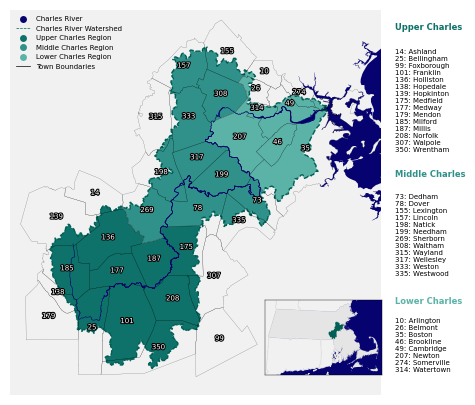

In [15]:
# Create overview map of watershed
fig,ax=plt.subplots(1,2,figsize=(6,5),width_ratios=[6,1])
fig.subplots_adjust(hspace=0, wspace=0)

# Create inset map
in_ax = fig.add_axes([0.57,0.15,0.2,0.15])
states[states.NAME!='Massachusetts'].plot(ax=in_ax,color='#f1f1f1',edgecolor='#e5e5e5',linewidth=0.5)
mass.plot(ax=in_ax,color='#e5e5e5')
CRW.plot(ax=in_ax,color='#015F56')
xMin, yMin, xMax, yMax = mass.total_bounds
box = gpd.GeoDataFrame(geometry=[shapely.box(xMin-10000, yMin-10000, xMax+10000, yMax+10000)], crs=mass.crs)
box.plot(ax=in_ax, color="#060270", zorder=0)
in_ax.set_ylim([yMin-10000,yMax+10000])
in_ax.set_xlim([xMin-10000,xMax+10000])
in_ax.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
[x.set_linewidth(0.3) for x in in_ax.spines.values()]

# Main map
CRW.boundary.plot(ax=ax[0],color='#015F56',linewidth=1,linestyle='--')
towns_fullout.boundary.plot(ax=ax[0],color='black',linewidth=0.1)
states[states.NAME=='Rhode Island'].plot(ax=ax[0],color='#f1f1f1',edgecolor='#f1f1f1',linewidth=2)
mass.plot(ax=ax[0],color='#f1f1f1')
CRW_Upper.dissolve().plot(ax=ax[0],color='#0E726A')
CRW_Middle.dissolve().plot(ax=ax[0],color='#2F9189')
CRW_Lower.dissolve().plot(ax=ax[0],color='#5BB3A8')
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
box = gpd.GeoDataFrame(geometry=[shapely.box(190000, 860000, 260000, 920000)], crs=mass.crs)
box.plot(ax=ax[0], color="#060270", zorder=0)
ax[0].set_ylim([860000,917000])
ax[0].set_xlim([190000,245000])
ax[0].axis('off')

# Labelling towns by IDs
towns_fullout['coords'] = towns_fullout['geometry'].apply(lambda x: x.centroid.coords[:])
towns_fullout['coords'] = [coords[0] for coords in towns_fullout['coords']]
for idx, row in towns_fullout.iterrows():
    ax[0].annotate(text=row['codes'], xy=row['coords'],
                horizontalalignment='center',fontsize=5,color='white',
                path_effects=[mpl.patheffects.withStroke(linewidth=1.5, foreground="black")])

# Creating custom legend 
l1 = mpl.lines.Line2D([], [], color='#015F56',linewidth=0.5,linestyle='--',label='Charles River Watershed')
l2 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#060270', marker='o',markeredgecolor=(1,1,1,0),markersize=5, label='Charles River')
l3 = mpl.lines.Line2D([], [], color='black',label='Town Boundaries',linewidth=0.5)
l4 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#0E726A', markeredgecolor=(1,1,1,0), marker='o',markersize=5, label='Upper Charles Region')
l5 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#2F9189', markeredgecolor=(1,1,1,0), marker='o',markersize=5, label='Middle Charles Region')
l6 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5BB3A8', markeredgecolor=(1,1,1,0), marker='o',markersize=5, label='Lower Charles Region')
ax[0].legend(handles=[l2,l1,l4,l5,l6,l3],loc='upper left',fontsize=5,frameon=False)

# Add key on right sidebar for finding names from town codes
ax[1].annotate(text='Upper Charles\n',xy=(0,0.92),fontsize=6,weight='bold',color='#0E726A')
ax[1].annotate(text='14: Ashland\n'+'25: Bellingham\n'+'99: Foxborough\n'+'101: Franklin\n'+'136: Holliston\n'
               +'138: Hopedale\n'+'139: Hopkinton\n'+'175: Medfield\n'+'177: Medway\n'+'179: Mendon\n'+'185: Milford\n'+'187: Millis\n'
               +'208: Norfolk\n'+'307: Walpole\n'+'350: Wrentham',xy=(0,0.63),fontsize=5)
ax[1].annotate(text='Middle Charles\n',xy=(0,0.54),fontsize=6,weight='bold',color='#2F9189')
ax[1].annotate(text='73: Dedham\n'+'78: Dover\n'+'155: Lexington\n'+'157: Lincoln\n'+'198: Natick\n'+'199: Needham\n'+'269: Sherborn\n'
               +'308: Waltham\n'+'315: Wayland\n'+'317: Wellesley\n'+'333: Weston\n'+'335: Westwood',xy=(0,0.31),fontsize=5)
ax[1].annotate(text='Lower Charles\n',xy=(0,0.21),fontsize=6,weight='bold',color='#5BB3A8')
ax[1].annotate(text='10: Arlington\n'+'26: Belmont\n'+'35: Boston\n'+'46: Brookline\n'+'49: Cambridge\n'+'207: Newton\n'+'274: Somerville\n'
               +'314: Watertown',xy=(0,0.06),fontsize=5)
ax[1].axis('off')

# Save figure
fig.savefig('Output Maps/CRWA Overview Map',dpi=300,bbox_inches='tight')

In [16]:
towns_fullout[towns_fullout['name']=='Lexington']

<IPython.core.display.HTML object>

geometry STATEFP20 COUNTYFP20  \
14  POLYGON ((224317.423 912854.79, 224316.441 912...        25        017   

   COUSUBFP20 COUSUBNS20     GEOID20 LSAD20 CLASSFP20 MTFCC20 CNECTAFP20  ...  \
14      35215   00619401  2501735215     43        T1   G4040        715  ...   

   BAS_ID     NAME SHAPE_FID  SHAPE_AREA_right  SHAPE_LEN_right    AREA_MI2  \
14     20  CHARLES      1216      8.050815e+08    250353.198863  310.842461   

         Area2       name  codes                                   coords  
14  310.842461  Lexington    155  (222154.49466301498, 910601.8161049634)  

[1 rows x 48 columns]

In [17]:
# Generating coordinates for labels and shifting some for legibility
towns_fullout['coords'] = towns_fullout['geometry'].apply(lambda x: x.centroid.coords[:])
towns_fullout['coords'] = [coords[0] for coords in towns_fullout['coords']]
towns_fullout.coords[4]=tuple((towns_fullout.coords[4][0]-2000,towns_fullout.coords[4][1]-2300))
towns_fullout.coords[7]=tuple((towns_fullout.coords[7][0]-1000,towns_fullout.coords[7][1]-300))
towns_fullout.coords[16]=tuple((towns_fullout.coords[16][0]-400,towns_fullout.coords[16][1]+400))
towns_fullout.coords[34]=tuple((towns_fullout.coords[34][0]+600,towns_fullout.coords[34][1]+500))
towns_fullout.coords[2]=tuple((towns_fullout.coords[2][0],towns_fullout.coords[2][1]+200))
towns_fullout.coords[21]=tuple((towns_fullout.coords[21][0]+800,towns_fullout.coords[21][1]-1300))
towns_fullout.coords[15]=tuple((towns_fullout.coords[15][0]+1000,towns_fullout.coords[15][1]-200))
towns_fullout.coords[14]=tuple((towns_fullout.coords[14][0]+200,towns_fullout.coords[14][1]+200))

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Local\Temp\ipykernel_2592\482385919.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  towns_fullout.coords[4]=tuple((towns_fullout.coords[4][0]-2000,towns_fullout.coords[4][1]-2300))
C:\Users\Chad\AppData\Local\Temp\i

<IPython.core.display.HTML object>

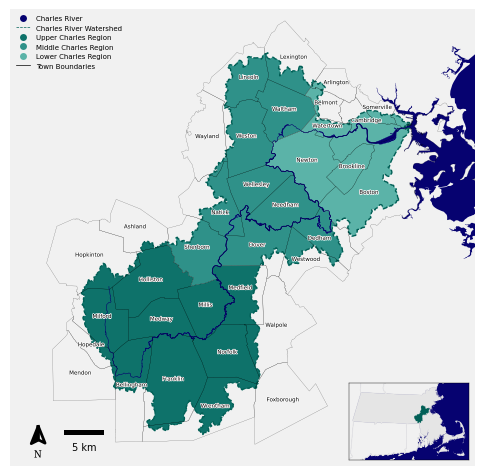

In [18]:
# Create overview map of watershed
fig,ax=plt.subplots(figsize=(6,8))
fig.subplots_adjust(hspace=0, wspace=0)

# Create inset map
in_ax = fig.add_axes([0.69,0.19,0.2,0.15])
states[states.NAME!='Massachusetts'].plot(ax=in_ax,color='#f1f1f1',edgecolor='#e5e5e5',linewidth=0.5)
mass.plot(ax=in_ax,color='#e5e5e5')
CRW.plot(ax=in_ax,color='#015F56')
xMin, yMin, xMax, yMax = mass.total_bounds
box = gpd.GeoDataFrame(geometry=[shapely.box(xMin-10000, yMin-10000, xMax+10000, yMax+10000)], crs=mass.crs)
box.plot(ax=in_ax, color="#060270", zorder=0)
in_ax.set_ylim([yMin-10000,yMax+10000])
in_ax.set_xlim([xMin-10000,xMax+10000])
in_ax.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
[x.set_linewidth(0.3) for x in in_ax.spines.values()]

# Main map
CRW.boundary.plot(ax=ax,color='#015F56',linewidth=1,linestyle='--')
towns_fullout.boundary.plot(ax=ax,color='black',linewidth=0.1)
states[states.NAME=='Rhode Island'].plot(ax=ax,color='#f1f1f1',edgecolor='#f1f1f1',linewidth=2)
mass.plot(ax=ax,color='#f1f1f1')
CRW_Upper.dissolve().plot(ax=ax,color='#0E726A')
CRW_Middle.dissolve().plot(ax=ax,color='#2F9189')
CRW_Lower.dissolve().plot(ax=ax,color='#5BB3A8')
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)
box = gpd.GeoDataFrame(geometry=[shapely.box(190000, 860000, 260000, 920000)], crs=mass.crs)
box.plot(ax=ax, color="#060270", zorder=0)
ax.set_ylim([860000,917000])
ax.set_xlim([187000,245000])
ax.axis('off')

# Labelling towns by name
for idx, row in towns_fullout.iterrows():
    ax.annotate(text=row['name'], xy=row['coords'],
                horizontalalignment='center',fontsize=4,color='black',
                path_effects=[mpl.patheffects.withStroke(linewidth=0.9, foreground="white")])

# Creating custom legend 
l1 = mpl.lines.Line2D([], [], color='#015F56',linewidth=0.5,linestyle='--',label='Charles River Watershed')
l2 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#060270', marker='o',markeredgecolor=(1,1,1,0),markersize=5, label='Charles River')
l3 = mpl.lines.Line2D([], [], color='black',label='Town Boundaries',linewidth=0.5)
l4 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#0E726A', markeredgecolor=(1,1,1,0), marker='o',markersize=5, label='Upper Charles Region')
l5 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#2F9189', markeredgecolor=(1,1,1,0), marker='o',markersize=5, label='Middle Charles Region')
l6 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5BB3A8', markeredgecolor=(1,1,1,0), marker='o',markersize=5, label='Lower Charles Region')
ax.legend(handles=[l2,l1,l4,l5,l6,l3],loc='upper left',fontsize=5,frameon=False)

# Scalebar and north arrow
add_north_arrow(ax=ax,scale=0.35,ylim_pos=0.05,xlim_pos=0.06,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower left',bbox_to_anchor=(60,20),length_fraction=0.1,font_properties={'size':7},box_alpha=0))

# Save figure
fig.savefig('Output Maps/CRWA Overview Map with names.png',dpi=300,bbox_inches='tight')

# Tree Canopy

In [ ]:
# Download TCC data for each year for the Charles River Watershed from GEE
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    img=ee.Image('USGS/NLCD_RELEASES/2021_REL/TCC/v2021-4/TCC_v2021-4_CONUS_'+year).clip(geemap.geopandas_to_ee(CRW)).select('Science_Percent_Tree_Canopy_Cover').reproject(crs='EPSG:26986',scale=30)
    geemap.ee_export_image(img,filename='../../Working_Data/TCC'+year+'.tif', region=geemap.geopandas_to_ee(CRW).geometry(), file_per_band=False)

In [ ]:
# Canopy statistics by towns
canStats=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/TCC"+'2008'+".tif",stats="count min mean max median"),index=Charles_Towns.index)
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/TCC"+year+".tif",stats="count min mean max median"),index=Charles_Towns.index)
    canStats=canStats.merge(stats,left_index=True,right_index=True,suffixes=('',year))
canStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageCanopy.csv')

# Canopy statistics for Watershed
canCRWStats=pd.DataFrame(rasterstats.zonal_stats(CRW.dissolve(), "../../Working_Data/TCC"+'2008'+".tif",stats="mean"))
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(CRW.dissolve(), "../../Working_Data/TCC"+year+".tif",stats="mean"))
    canCRWStats=canCRWStats.join(stats,rsuffix=year)
canCRWStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageCRWCanopy.csv')

# Canopy statistics for Upper subregion
canUStats=pd.DataFrame(rasterstats.zonal_stats(CRW_Upper.dissolve(), "../../Working_Data/TCC"+'2008'+".tif",stats="mean"))
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(CRW_Upper.dissolve(), "../../Working_Data/TCC"+year+".tif",stats="mean"))
    canUStats=canUStats.join(stats,rsuffix=year)
canUStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageUCanopy.csv')

# Canopy statistics for Middle subregion
canMStats=pd.DataFrame(rasterstats.zonal_stats(CRW_Middle.dissolve(), "../../Working_Data/TCC"+'2008'+".tif",stats="mean"))
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(CRW_Middle.dissolve(), "../../Working_Data/TCC"+year+".tif",stats="mean"))
    canMStats=canMStats.join(stats,rsuffix=year)
canMStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageMCanopy.csv')

# Canopy statistics for Lower subregion 
canLStats=pd.DataFrame(rasterstats.zonal_stats(CRW_Lower.dissolve(), "../../Working_Data/TCC"+'2008'+".tif",stats="mean"))
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(CRW_Lower.dissolve(), "../../Working_Data/TCC"+year+".tif",stats="mean"))
    canLStats=canLStats.join(stats,rsuffix=year)
canLStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageLCanopy.csv')

In [132]:
# Reading in data from previous cell, metling, and cleaning it into format for seaborn plots
CanData=pd.read_csv('../../Working_Data/AverageCRWCanopy.csv')
CanData=pd.melt(CanData,var_name='Year')
for i in CanData.index:
    CanData.loc[i,'Year']=CanData['Year'].iloc[i][-4:]

CanUData=pd.read_csv('../../Working_Data/AverageUCanopy.csv')
CanUData=pd.melt(CanUData,var_name='Year')
for i in CanUData.index:
    CanUData.loc[i,'Year']=CanUData['Year'].iloc[i][-4:]

CanMData=pd.read_csv('../../Working_Data/AverageMCanopy.csv')
CanMData=pd.melt(CanMData,var_name='Year')
for i in CanMData.index:
    CanMData.loc[i,'Year']=CanMData['Year'].iloc[i][-4:]

CanLData=pd.read_csv('../../Working_Data/AverageLCanopy.csv')
CanLData=pd.melt(CanLData,var_name='Year')
for i in CanLData.index:
    CanLData.loc[i,'Year']=CanLData['Year'].iloc[i][-4:]

<IPython.core.display.HTML object>

In [133]:
100*(CanLData.value[14]-CanLData.value[1])/CanLData.value[1]

<IPython.core.display.HTML object>

-6.482536182571139

<IPython.core.display.HTML object>

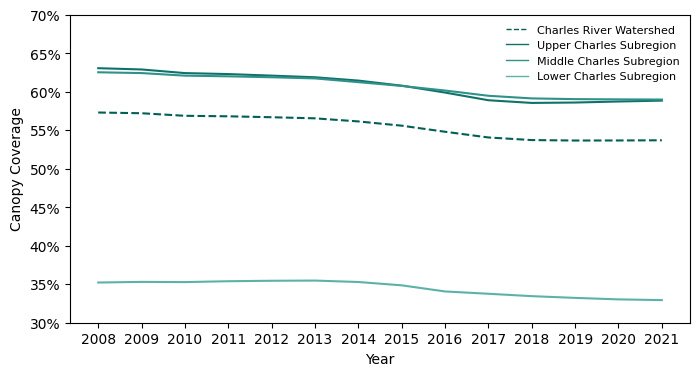

In [134]:
# Plot average canopy coverage for each region over time
fig,ax=plt.subplots(figsize=(8,4))
sns.lineplot(CanData[1:],x='Year',y='value',ax=ax,color='#015F56',linestyle='--')
sns.lineplot(CanUData[1:],x='Year',y='value',ax=ax,color='#0E726A')
sns.lineplot(CanMData[1:],x='Year',y='value',ax=ax,color='#2F9189')
sns.lineplot(CanLData[1:],x='Year',y='value',ax=ax,color='#5BB3A8')
ax.set_ylabel('Canopy Coverage')
ax.set_ylim([30,70])
l1 = mpl.lines.Line2D([], [], color='#015F56',linewidth=1,linestyle='--',label='Charles River Watershed')
l4 = mpl.lines.Line2D([], [], color='#0E726A', linewidth=1, label='Upper Charles Subregion')
l5 = mpl.lines.Line2D([], [], color='#2F9189', linewidth=1, label='Middle Charles Subregion')
l6 = mpl.lines.Line2D([], [], color='#5BB3A8', linewidth=1, label='Lower Charles Subregion')
ax.legend(handles=[l1,l4,l5,l6],loc='upper right',fontsize=8,frameon=False)
ax.set_xlabel('Year')
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(decimals=0))
fig.savefig('Output Maps/Canopy CRW time series',dpi=300,transparent=True,bbox_inches='tight')

In [135]:
# Read canopy data by town and reformat/clean
CanData=pd.read_csv('../../Working_Data/AverageCanopy.csv')
CanData['name']=CanData.NAMELSAD20.str.split(' ').str[0]
CanData=CanData[['name','mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']]
CanData=pd.melt(CanData,id_vars='name',var_name='Year')
for i in CanData.index:
    CanData.loc[i,'Year']=CanData['Year'].iloc[i][-4:]

<IPython.core.display.HTML object>

In [136]:
# Extracting town data for each subregion and converting to acreage
CanData_U=CanData[np.isin(CanData['name'],Upper)]
CanData_U=CanData_U.pivot(columns='Year',index='name')
for column in CanData_U.columns:
    lista=(CanData_U[column]/100)
    listb=CRW_Upper.geometry.area*2.47105381/10000
    CanData_U[column]=[a*b for a,b in zip(lista,listb)]
    
CanData_M=CanData[np.isin(CanData['name'],Middle)]
CanData_M=CanData_M.pivot(columns='Year',index='name')
for column in CanData_M.columns:
    lista=(CanData_M[column]/100)
    listb=CRW_Middle.geometry.area*2.47105381/10000
    CanData_M[column]=[a*b for a,b in zip(lista,listb)]
    
CanData_L=CanData[np.isin(CanData['name'],Lower)]
CanData_L=CanData_L.pivot(columns='Year',index='name')
for column in CanData_L.columns:
    lista=(CanData_L[column]/100)
    listb=CRW_Lower.geometry.area*2.47105381/10000
    CanData_L[column]=[a*b for a,b in zip(lista,listb)]

<IPython.core.display.HTML object>

In [137]:
# Simplified version of above data with just total acreage for each subregion instead of dissagregated by town
simData=pd.DataFrame([CanData_U.sum(axis=0),CanData_M.sum(axis=0),CanData_L.sum(axis=0)])

<IPython.core.display.HTML object>

In [138]:
#Defining color codes for subregions for plotting
regcolors=['#0E726A','#2F9189','#5BB3A8']
my_regs = mpl.colors.LinearSegmentedColormap.from_list('my_regs',regcolors,N=256)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

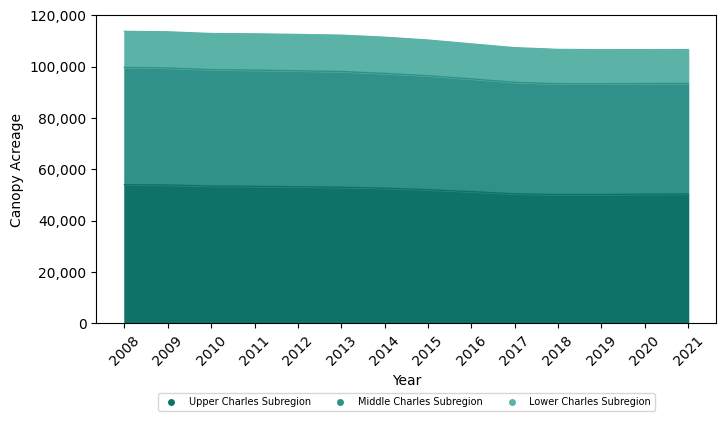

In [139]:
# Acreage of each subregion over time 
fig,ax=plt.subplots(figsize=(8,4))
simData.T.plot.area(ax=ax,stacked=True,legend=False,cmap=my_regs,linewidth=1)

l4 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#0E726A', markeredgecolor=(1,1,1,0), marker='o',markersize=5, label='Upper Charles Subregion')
l5 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#2F9189', markeredgecolor=(1,1,1,0), marker='o',markersize=5, label='Middle Charles Subregion')
l6 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5BB3A8', markeredgecolor=(1,1,1,0), marker='o',markersize=5, label='Lower Charles Subregion')
ax.legend(handles=[l4,l5,l6],loc='lower center',fontsize=7,frameon=True,ncols=3,bbox_to_anchor=(0.5,-0.3))

ax.set_ylabel('Canopy Acreage')
ax.set_xlabel('Year')
ax.set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels=['2008','2009','2010','2011','2012','2013','2014',
                                                              '2015','2016','2017','2018','2019','2020','2021'],rotation=45)
ax.set_ylim([0,120000])
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.savefig('Output Maps/Canopy time series acreage simple.png',dpi=300,transparent=True,bbox_inches='tight')

<IPython.core.display.HTML object>

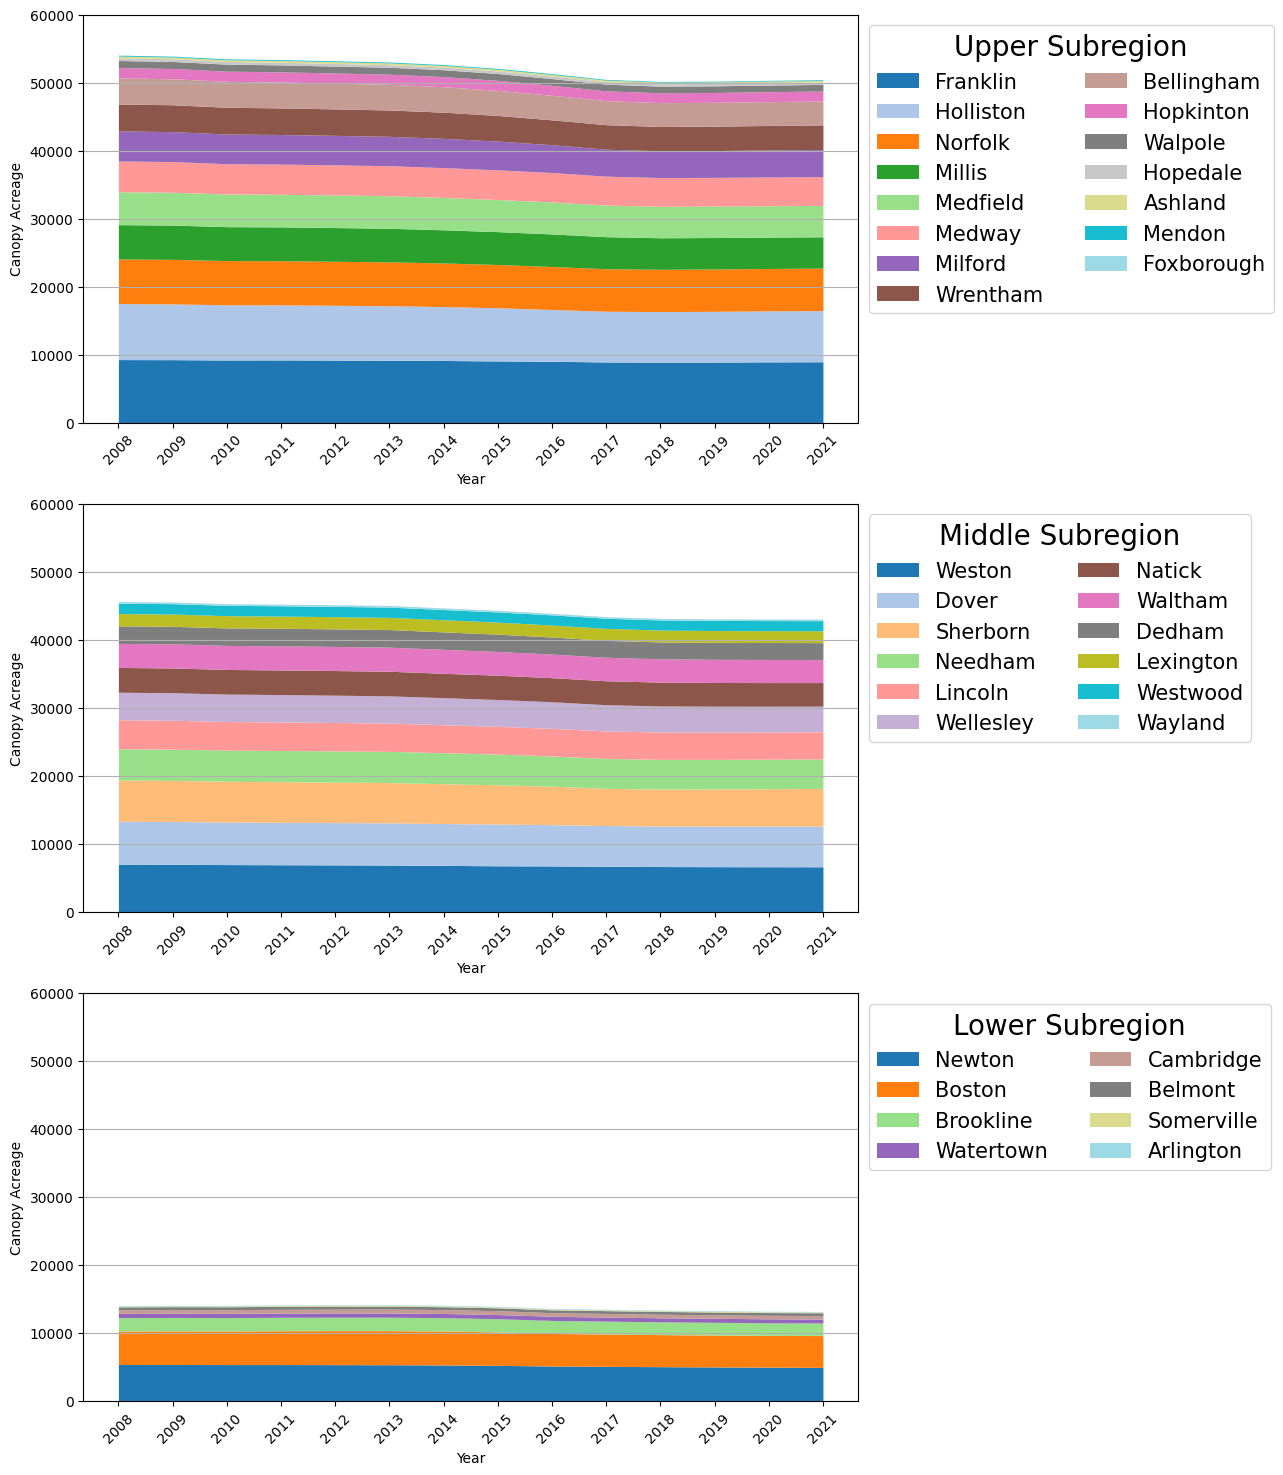

In [140]:
# Acreage over time for each town broken down by subregion
fig,ax=plt.subplots(3,1,figsize=(10,18))

CanData_U.sort_values(('value', '2008'),ascending=False).T.plot.area(ax=ax[0],stacked=True,legend=True,cmap='tab20',linewidth=0)
CanData_M.sort_values(('value', '2008'),ascending=False).T.plot.area(ax=ax[1],stacked=True,legend=True,cmap='tab20',linewidth=0)
CanData_L.sort_values(('value', '2008'),ascending=False).T.plot.area(ax=ax[2],stacked=True,legend=True,cmap='tab20',linewidth=0)

# Fixing labels, tick marks, and legend
ax[0].set_ylabel('Canopy Acreage')
ax[0].set_xlabel('Year')
ax[0].set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels=['2008','2009','2010','2011','2012','2013','2014',
                                                              '2015','2016','2017','2018','2019','2020','2021'],rotation=45)
h,l = ax[0].get_legend_handles_labels()
ax[0].legend_.remove()
ax[0].legend(h,l, ncol=2,loc='upper left',bbox_to_anchor=(1,1),fontsize=15,title='Upper Subregion',title_fontsize=20)
ax[0].set_ylim([0,60000])
ax[0].grid(visible=True,which='major',axis='y')

# Fixing labels, tick marks, and legend
ax[1].set_ylabel('Canopy Acreage')
ax[1].set_xlabel('Year')
ax[1].set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels=['2008','2009','2010','2011','2012','2013','2014',
                                                              '2015','2016','2017','2018','2019','2020','2021'],rotation=45)
h,l = ax[1].get_legend_handles_labels()
ax[1].legend_.remove()
ax[1].legend(h,l, ncol=2,loc='upper left',bbox_to_anchor=(1,1),fontsize=15,title='Middle Subregion',title_fontsize=20)
ax[1].set_ylim([0,60000])
ax[1].grid(visible=True,which='major',axis='y')

# Fixing labels, tick marks, and legend
ax[2].set_ylabel('Canopy Acreage')
ax[2].set_xlabel('Year')
ax[2].set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels=['2008','2009','2010','2011','2012','2013','2014',
                                                              '2015','2016','2017','2018','2019','2020','2021'],rotation=45)
h,l = ax[2].get_legend_handles_labels()
ax[2].legend_.remove()
ax[2].legend(h,l, ncol=2,loc='upper left',bbox_to_anchor=(1,1),fontsize=15,title='Lower Subregion',title_fontsize=20)
ax[2].set_ylim([0,60000])
ax[2].grid(visible=True,which='major',axis='y')

fig.savefig('Output Maps/Canopy time series.png',dpi=300,transparent=True,bbox_inches='tight')

In [88]:
# Read in tree canopy data and get plotting extent for mapping
TCC2021,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
TCC2008,trans=mask(rio.open('../../Working_Data/TCC2008.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
plot_extent = rio.plot.plotting_extent(rio.open('../../Working_Data/TCC2021.tif'))

<IPython.core.display.HTML object>

In [89]:
# Calculate change as percent change from 2008 to 2021
TCC2021_rxr=rioxarray.open_rasterio('../../Working_Data/TCC2021.tif', masked=True)
TCC2021_rxr=TCC2021_rxr.rio.clip(CRW.dissolve().geometry)
TCC2008_rxr=rioxarray.open_rasterio('../../Working_Data/TCC2008.tif', masked=True)
TCC2008_rxr=TCC2008_rxr.rio.clip(CRW.dissolve().geometry)
dTCC=100*(TCC2021_rxr-TCC2008_rxr)/TCC2008_rxr
dTCC.rio.to_raster("../../Working_Data/dTCCv2.tif")
dTCC,trans=mask(rio.open('../../Working_Data/dTCCv2.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)

<IPython.core.display.HTML object>

In [63]:
# Create my own version of a Greens colormap
colors7=['#f7fcf5','#6d934f','#006d2c'] 
my_greens = mpl.colors.LinearSegmentedColormap.from_list('my_cmap7',colors7,N=256)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

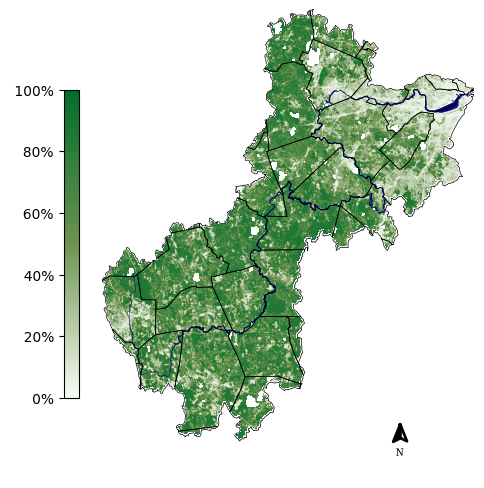

In [127]:
# Plot 2021 tree canopy coverage
f, ax = plt.subplots(figsize=(6,8))
hidden = ax.imshow(TCC2021[0,:,:],cmap=my_greens,extent=plot_extent,alpha=1,vmin=0,vmax=100)
show(TCC2021,cmap=my_greens,ax=ax,extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)

cbar=f.colorbar(hidden, cmap=my_greens,orientation='vertical',location='left',
                shrink=0.5,aspect=20,pad=0.05,format="%4i%%")
#cbar.ax.tick_params(labelsize=16)
#cbar.set_label(label='Tree Canopy Coverage (2021)',fontsize=16)

ax.add_artist(ScaleBar(1,location='lower left',bbox_to_anchor=(1250,70),length_fraction=0.2,font_properties={'size':9},box_alpha=0))
ax.axis('off')
add_north_arrow(ax=ax,scale=0.4,ylim_pos=0.0,xlim_pos=0.8,text_scaler=3, text_yT=-3)

f.savefig('Output Maps/2021 TCC for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [92]:
# Calculate zonal statistics, join back onto town data frame and extract town name for 2021 tree canopy coverage
canStats=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=Charles_Towns.index)
canStats=canStats.merge(Charles_Towns.to_crs(epsg=26986),left_index=True,right_index=True)
canStats['name']=canStats.index.str.split(' ').str[0]

<IPython.core.display.HTML object>

In [93]:
# Sort by mean tree canopy percent change
canStats=canStats.sort_values(by='mean')

<IPython.core.display.HTML object>

In [94]:
# Add barplot, set properties, and change colors
cols = ['#003c30' if np.isin(x,Upper) else ('#2F9189' if np.isin(x,Middle) else '#757575') for x in canStats.name]
ax=sns.catplot(canStats,y='mean',x='name',orient='v',color='#6d934f',
            kind='bar',height=6, aspect=5,saturation=1,width=0.8,gap=0.2,legend=False)
plt.hlines(y=53,xmin=-.5,xmax=34.5,color='#015F56', linewidth=6,linestyle='--')
ax.set(xlabel=None)
plt.ylabel(ylabel='Canopy Coverage',fontsize=40)
plt.xticks(rotation=90,fontsize=40,weight='bold')
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), cols):
    ticklabel.set_color(tickcolor)
plt.yticks(fontsize=40)
plt.ylim([0,100])
l1 = mpl.lines.Line2D([], [], color='#015F56', linewidth=4,linestyle='--',label='Watershed Average')
l4 = mpl.patches.Patch(color='#003c30',label='Upper Subregion')
l5 = mpl.patches.Patch(color='#2F9189',label='Middle Subregion')
l6 = mpl.patches.Patch(color='#757575',label='Lower Subregion')
plt.gca().text(34.7,51.5,'53%',fontsize=36,color='#015F56',weight='bold')
plt.legend(handles=[l1,l4,l5,l6],loc='upper left',fontsize=30,frameon=False,bbox_to_anchor=(0, 1.1))
ax.set_yticklabels(['0','20%','40%','60%','80%','100%'], rotation=0)
plt.savefig('Output Maps/2021 Canopy graph for publication.png',transparent=True,dpi=300,bbox_inches='tight')

<IPython.core.display.HTML object>

NameError: name 'Upper' is not defined

In [ ]:
# Calculate zonal statistics, join back onto town data frame and extract town name for change in tree canopy coverage
townStats=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=Charles_Towns.index)
townStats=townStats.merge(Charles_Towns.to_crs(epsg=26986),left_index=True,right_index=True)
townStats['name']=townStats.index.str.split(' ').str[0]
townStats2=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/TCC2008.tif",stats="count min mean max median"),index=Charles_Towns.index)
townStats2=townStats2.merge(Charles_Towns.to_crs(epsg=26986),left_index=True,right_index=True)
townStats2['name']=townStats2.index.str.split(' ').str[0]
townStats['Change']=100*(townStats['mean']-townStats2['mean'])/townStats2['mean']

In [ ]:
# Sort by mean tree canopy percent change
townStats=townStats.sort_values(by='Change')

<IPython.core.display.HTML object>

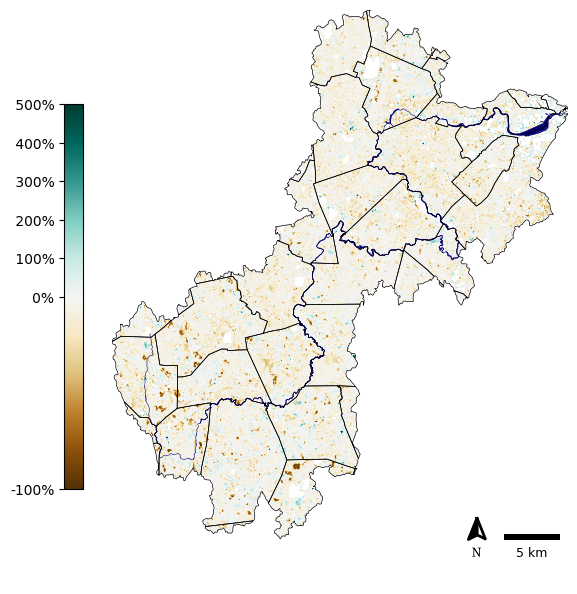

In [117]:
# Create subplots
f, ax = plt.subplots(figsize=(6,8),layout='tight')

hidden = ax.imshow(dTCC[0,:,:],cmap='BrBG',extent=plot_extent,alpha=1,norm=mpl.colors.TwoSlopeNorm(vmin=-100, vcenter=0, vmax=500))

show(dTCC,cmap='BrBG',ax=ax,extent=plot_extent,alpha=1,norm=mpl.colors.TwoSlopeNorm(vmin=-100, vcenter=0, vmax=500))
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)

cbar=f.colorbar(hidden, cmap='BrBG',orientation='vertical',location='left',
                shrink=0.5,aspect=20,pad=0.05,format="%4i%%")
cbar.ax.locator_params(nbins=6)
#cbar.ax.tick_params(rotation=45)

ax.add_artist(ScaleBar(1,location='lower left',bbox_to_anchor=(500,30),length_fraction=0.2,font_properties={'size':9},box_alpha=0))
ax.axis('off')
add_north_arrow(ax=ax,scale=0.4,ylim_pos=0.0,xlim_pos=0.8,text_scaler=3, text_yT=-3)
f.savefig('Output Maps/dTCC for publication.png',transparent=True,dpi=300,bbox_inches='tight')

<IPython.core.display.HTML object>

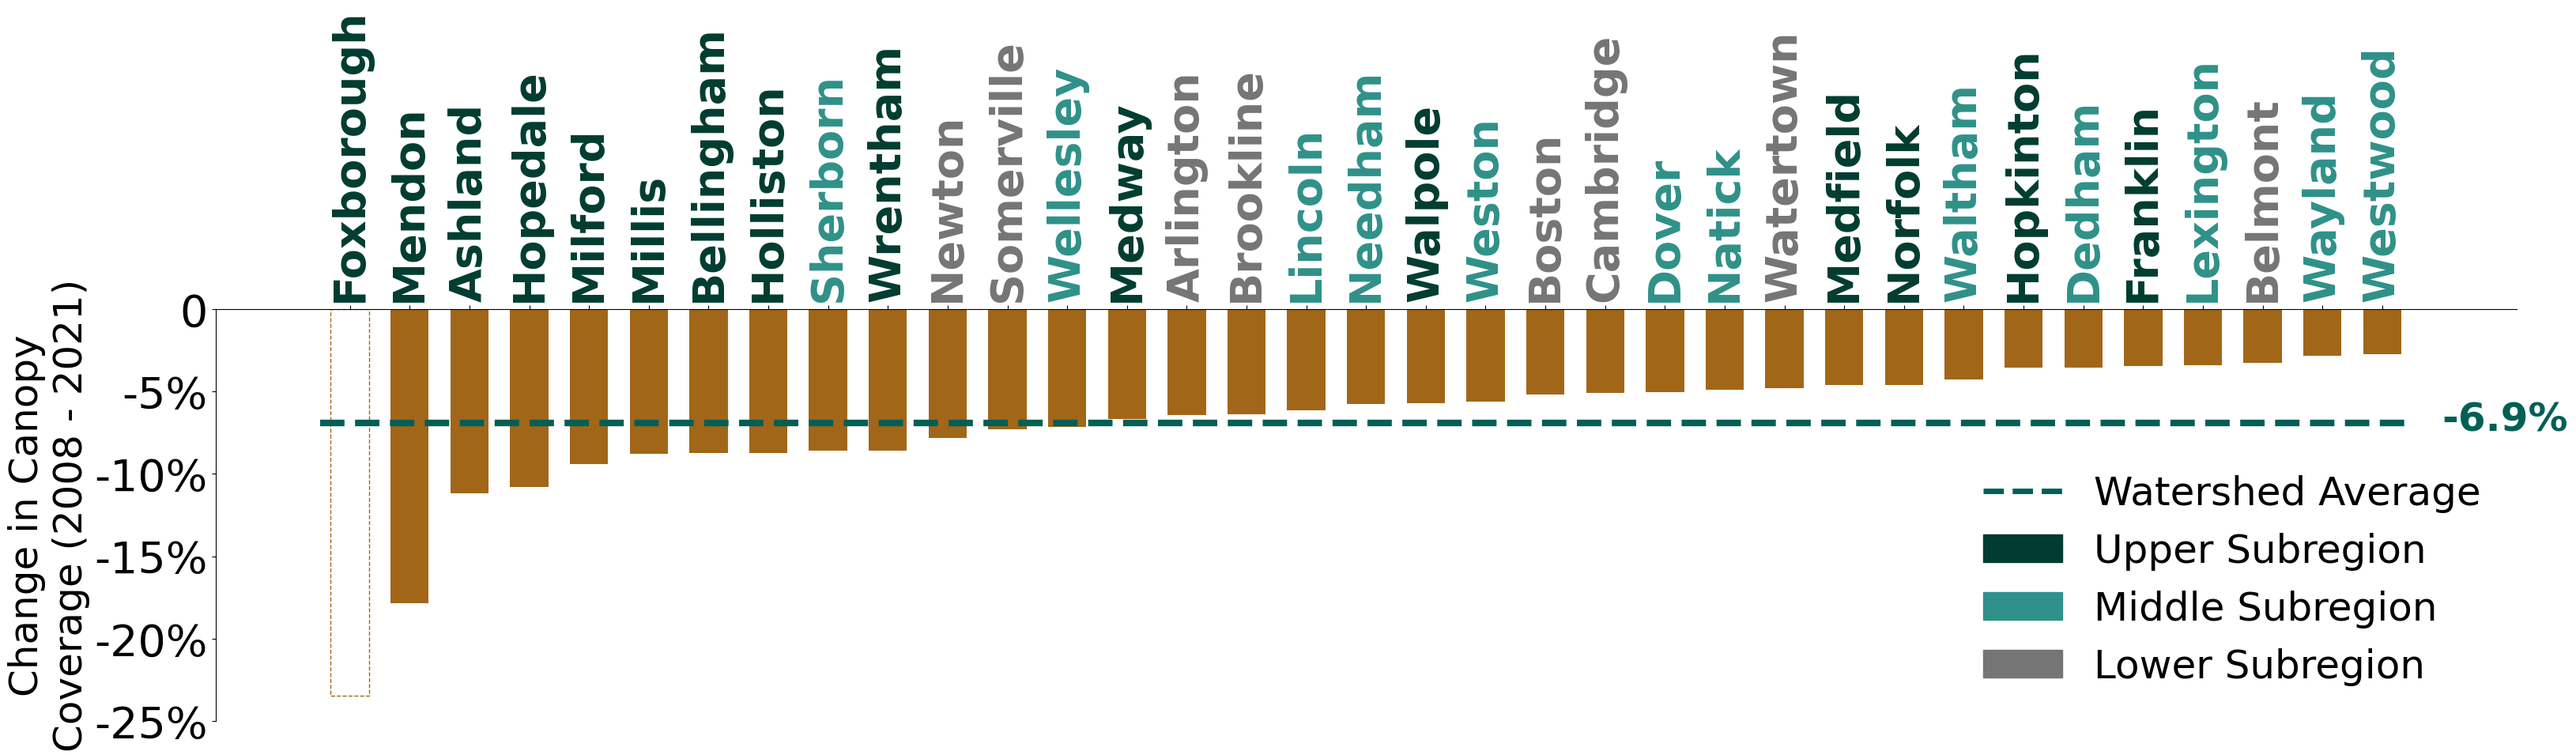

In [151]:
# Add barplot, set properties, and change colors for tree canopy change 2008 - 2021
cols = ['#003c30' if np.isin(x,Upper) else ('#2F9189' if np.isin(x,Middle) else '#757575') for x in townStats.name]
ax=sns.catplot(townStats,y='Change',x='name',orient='v',color='#a26619',
            kind='bar',height=6, aspect=5,saturation=1,width=0.8,gap=0.2,legend=False)

ax.ax.patches[0].set_color('white')
ax.ax.patches[0].set_edgecolor('#a26619')
ax.ax.patches[0].set_linestyle('--')
        
plt.hlines(y=-6.9,xmin=-.5,xmax=34.5,color='#015F56', linewidth=6,linestyle='--')
ax.set(xlabel=None)
plt.gca().xaxis.tick_top()
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['bottom'].set_visible(False)
plt.ylabel(ylabel='Change in Canopy\nCoverage (2008 - 2021)',fontsize=36)
plt.xticks(rotation=90,fontsize=40,weight='bold')
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), cols):
    ticklabel.set_color(tickcolor)
plt.yticks(fontsize=40)
#plt.ylim([-20,0])
l1 = mpl.lines.Line2D([], [], color='#015F56', linewidth=5,linestyle='--',label='Watershed Average')
l4 = mpl.patches.Patch(color='#003c30',label='Upper Subregion')
l5 = mpl.patches.Patch(color='#2F9189',label='Middle Subregion')
l6 = mpl.patches.Patch(color='#757575',label='Lower Subregion')
plt.gca().text(35,-7.4,'-6.9%',fontsize=36,color='#015F56',weight='bold')
plt.legend(handles=[l1,l4,l5,l6],loc='lower right',fontsize=36,frameon=False)
ax.set_yticklabels(['-25%','-20%','-15%','-10%','-5%','0'], rotation=0)
plt.savefig('Output Maps/dTCC graph for publication.png',transparent=True,dpi=300,bbox_inches='tight')

# Land Use

In [238]:
# Read in LULC data from CRWA, calculate area, and clean for mapping
LULC2021=gpd.read_file('../../Working_Data/RasterT_landuse1_Cl_Dissolve.shp')
LULC2021['acreage']=LULC2021.geometry.area*2.47105381/10000
LULC2021=LULC2021.sort_values('acreage',ascending=False)
LULC2021=LULC2021.reset_index()
LULC2021['Class_Order']=['A','B','C','D','E','F','G','H','I','J']

<IPython.core.display.HTML object>

In [247]:
# Calculate zonal statistics
LU_stats=pd.DataFrame(rasterstats.zonal_stats(LULC2021, "../../Working_Data/TCC2021.tif",stats="mean"))

<IPython.core.display.HTML object>

In [248]:
# Average canopy cover by land use class
LU_stats['mean']

<IPython.core.display.HTML object>


0    75.771012
1    50.905486
2    29.954527
3    16.431333
4    48.364003
5    31.738042
6    31.259514
7    27.867843
8    16.160493
9    27.786132
Name: mean, dtype: float64

In [249]:
# Area of each land use type
LULC2021['acreage']

<IPython.core.display.HTML object>


0    87133.156441
1    33034.096559
2    25947.307209
3    15442.739862
4    13692.414726
5     8048.012618
6     5083.086475
7     4616.237436
8     3388.262533
9     2549.352667
Name: acreage, dtype: float64

In [250]:
# Area of tree canopy for each land use type
LU_stats['mean']/100*LULC2021['acreage']

<IPython.core.display.HTML object>


0    66021.674757
1    16816.167541
2     7772.393081
3     2537.448068
4     6622.199931
5     2554.281636
6     1588.948127
7     1286.445787
8      547.559930
9      708.366490
dtype: float64

In [246]:
# Percent of land by land use type
LULC2021['areaperc']=100*LULC2021['acreage']/(LULC2021['acreage'].sum())
LULC2021

<IPython.core.display.HTML object>

index                       Class    Shape_Leng    Shape_Area  \
0      2                      Forest  9.504616e+06  3.526154e+08   
1      6     Low Density Residential  6.538430e+06  1.336842e+08   
2      3    High Density Residential  2.335223e+06  1.050050e+08   
3      1                  Commercial  2.219898e+06  6.249455e+07   
4      7  Medium Density Residential  1.847174e+06  5.541124e+07   
5      8                   Open Land  1.909790e+06  3.256915e+07   
6      9                       Water  5.423495e+05  2.057052e+07   
7      0                 Agriculture  5.824638e+05  1.868125e+07   
8      5                  Industrial  4.941041e+05  1.371181e+07   
9      4                     Highway  7.933077e+05  1.031686e+07   

                                            geometry       acreage  \
0  MULTIPOLYGON (((206335.376 864453.704, 206335....  87133.156441   
1  MULTIPOLYGON (((206727.01 864547.904, 206725.5...  33034.096559   
2  MULTIPOLYGON (((206989.03 865158.581, 206989.0...  25947.307209   
3  MULTIPOLYGON (((204539.662 864733.814, 204541....  15442.739862   
4  MULTIPOLYGON (((206976.055 865262.033, 206962....  13692.414726   
5  MULTIPOLYGON (((212121.11 865070.63, 212146.56...   8048.012618   
6  MULTIPOLYGON (((211641.528 865705.397, 211643....   5083.086475   
7  MULTIPOLYGON (((210797.7 864218.165, 210796.84...   4616.237436   
8  MULTIPOLYGON (((211712.255 864700.26, 211713.2...   3388.262533   
9  MULTIPOLYGON (((211476.343 865117.231, 211482....   2549.352667   

  Class_Order   areaperc  
0           A  43.799886  
1           B  16.605500  
2           C  13.043130  
3           D   7.762719  
4           E   6.882870  
5           F   4.045556  
6           G   2.555154  
7           H   2.320479  
8           I   1.703204  
9           J   1.281502

In [251]:
LULC2021['Class'][2]='Residential, High Density'
LULC2021['Class'][4]='Residential, Medium Density'
LULC2021['Class'][1]='Residential, Low Density'

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Local\Temp\ipykernel_6572\2070976345.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  LULC2021['Class'][2]='Residential, High Density'
C:\Users\Chad\AppData\Local\Temp\ipykernel_6572\2070976345.py:2: FutureWarning: C

In [255]:
colors=['#006d2c','#DFD5BA','#DFC57B','#BC4A4B','#E0CE9B','#74c476','#060270','#a26619','#8F6999','#757575']
LU_cmap = mpl.colors.LinearSegmentedColormap.from_list('LU_cmap',colors,N=256)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

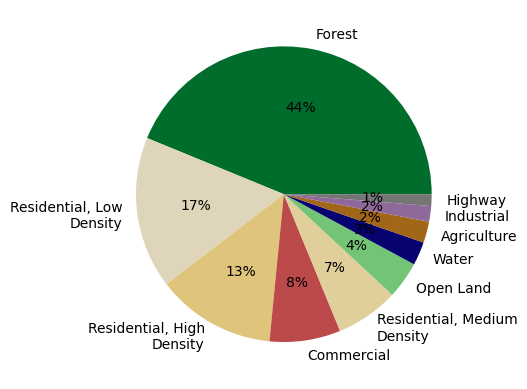

In [263]:
plt.pie(LULC2021['acreage'],labels=[fill(l, 20) for l in LULC2021.Class],colors=colors,autopct='%.0f%%')
plt.savefig('Output Maps/Land Use 2021 Pie Chart.png',dpi=300,transparent=True,bbox_inches='tight')

<IPython.core.display.HTML object>

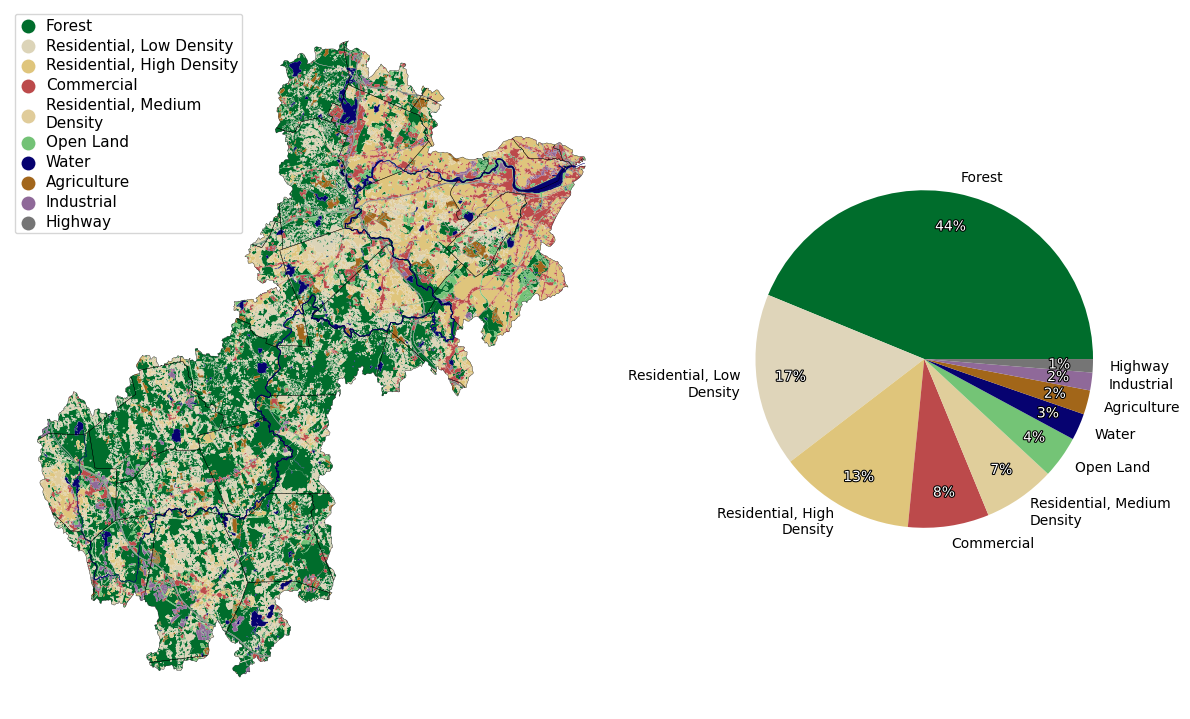

In [293]:
fig,ax=plt.subplots(1,2,width_ratios=[2,1],figsize=(12,8),layout='tight')
LULC2021.plot(ax=ax[0],column='Class_Order',cmap=LU_cmap,legend=True,legend_kwds={'fontsize':7,'loc':'upper left'})
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='black',linewidth=0.25)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')
leg1 = ax[0].get_legend()
new_legtxt = [fill(l, 25) for l in LULC2021.Class]
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
    eb.set_size(fontsize=11)

_, _, autotexts=ax[1].pie(LULC2021['acreage'],labels=[fill(l, 20) for l in LULC2021.Class],colors=colors,autopct='%.0f%%',radius=1.4,pctdistance=.8)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_path_effects([mpl.patheffects.withStroke(linewidth=1.5, foreground="black")])

fig.savefig('Output Maps/2021 Land Use.png',dpi=300,transparent=True,bbox_inches='tight')

In [57]:
# Harmonize data sources
d2016={'Agriculture':'Agriculture',
       'Commercial':'Commercial',
       'Mixed use, primarily commercial':'Commercial',
       'Forest':'Forest',
       'Open land':'Forest',
       'Industrial':'Industrial',
       'Mixed use, primarily residential':'Residential',
       'Residential - multi-family':'Residential',
       'Residential - other':'Residential',
       'Residential - single family':'Residential',
       'Right-of-way':'ROW',
       'Water':'Water',
       'Unknown':'Excluded',
       'Mixed use, other':'Excluded',
       'Tax exempt':'Excluded'}
d2021={'Agriculture':'Agriculture',
       'Commercial':'Commercial',
       'Forest':'Forest',
       'Industrial':'Industrial',
       'High Density Residential':'Residential',
       'Medium Density Residential':'Residential',
       'Low Density Residential':'Residential',
       'Highway':'ROW',
       'Water':'Water',
       'Open Land':'Excluded'}
LULC2016['Use']=LULC2016['USEGENNAME'].map(d2016)
LULC2021['Use']=LULC2021['Class'].map(d2021)

<IPython.core.display.HTML object>

In [66]:
R2016_TCC,trans=mask(rio.open('../../Working_Data/TCC2016.tif'),LULC2016[LULC2016.Use=='Residential'].to_crs(epsg=26986).geometry,crop=True,filled=False)
R2016_extent=[LULC2016[LULC2016.Use=='Residential'].dissolve().geometry.bounds['minx'][0],LULC2016[LULC2016.Use=='Residential'].dissolve().geometry.bounds['maxx'][0],LULC2016[LULC2016.Use=='Residential'].dissolve().geometry.bounds['miny'][0],LULC2016[LULC2016.Use=='Residential'].dissolve().geometry.bounds['maxy'][0]]
R2021_TCC,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),LULC2021[LULC2021.Use=='Residential'].to_crs(epsg=26986).geometry,crop=True,filled=False)
R2021_extent=[LULC2021[LULC2021.Use=='Residential'].dissolve().geometry.bounds['minx'][0],LULC2021[LULC2021.Use=='Residential'].dissolve().geometry.bounds['maxx'][0],LULC2021[LULC2021.Use=='Residential'].dissolve().geometry.bounds['miny'][0],LULC2021[LULC2021.Use=='Residential'].dissolve().geometry.bounds['maxy'][0]]

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

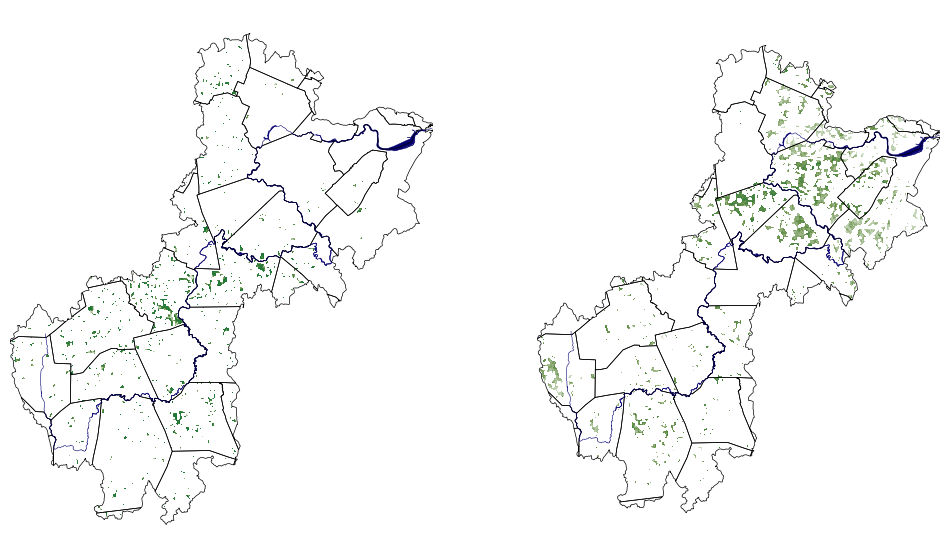

In [75]:
fig,ax=plt.subplots(1,2,figsize=(12,8))
show(R2016_TCC,ax=ax[0],cmap=my_greens,extent=R2016_extent,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='black',linewidth=0.5)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')
show(R2021_TCC,ax=ax[1],cmap=my_greens,extent=R2021_extent,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[1], color='black',linewidth=0.5)
Charles.plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1],color='#060270',linewidth=0.4)
ax[1].axis('off')
fig.savefig('Output Maps/Residential Land Use 2016_2021.png',dpi=300,transparent=True,bbox_inches='tight')

# Soils Maps

In [ ]:
#Import soils data and clip to boundaries for smaller working files
#Soils = gpd.clip(gpd.read_file("../../Raw_Data/Soils_MassGIS_SHP/SOILS_MUPOLYGON_TOP20.shp",mask=CRW.to_crs('EPSG:26986')),CRW.to_crs('EPSG:26986'))
#Soils.to_file('../../Working_Data/SoilsCRW.shp')  

In [336]:
# Read in smaller working file
Soils=gpd.read_file('../../Working_Data/SoilsCRW.shp')  

<IPython.core.display.HTML object>

In [354]:
# Define own hydric soils colormap
hydric_recode={
    'Unranked':'A',
    'No':'B',
    'Yes':'C'
}
Soils['Hydric_Code']=Soils['HYDRCRATNG'].map(hydric_recode)
OWN_palette = {'A':'#A09F9F','B':'#ecd8a5','C':'#5bb2a8'}
OWN_cmap = mpl.colors.ListedColormap([OWN_palette[b] for b in ['A','B','C']])

<IPython.core.display.HTML object>

In [355]:
# Recode drainage codes for reordering
drain_recode={
    'Excessively drained': 'A',
    'Somewhat excessively drained': 'B',
    'Well drained': 'C',
    'Moderately well drained': 'D',
    'Poorly drained': 'E',
    'Very poorly drained': 'F'
}
Soils['Drain_Code']=Soils['DRAINCLASS'].map(drain_recode)

<IPython.core.display.HTML object>

In [356]:
# Drainage custom colormap
colors5=['#dab972','#e5e5e5','#5bb2a8'] 
my_cmap5 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap5',colors5,N=6)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

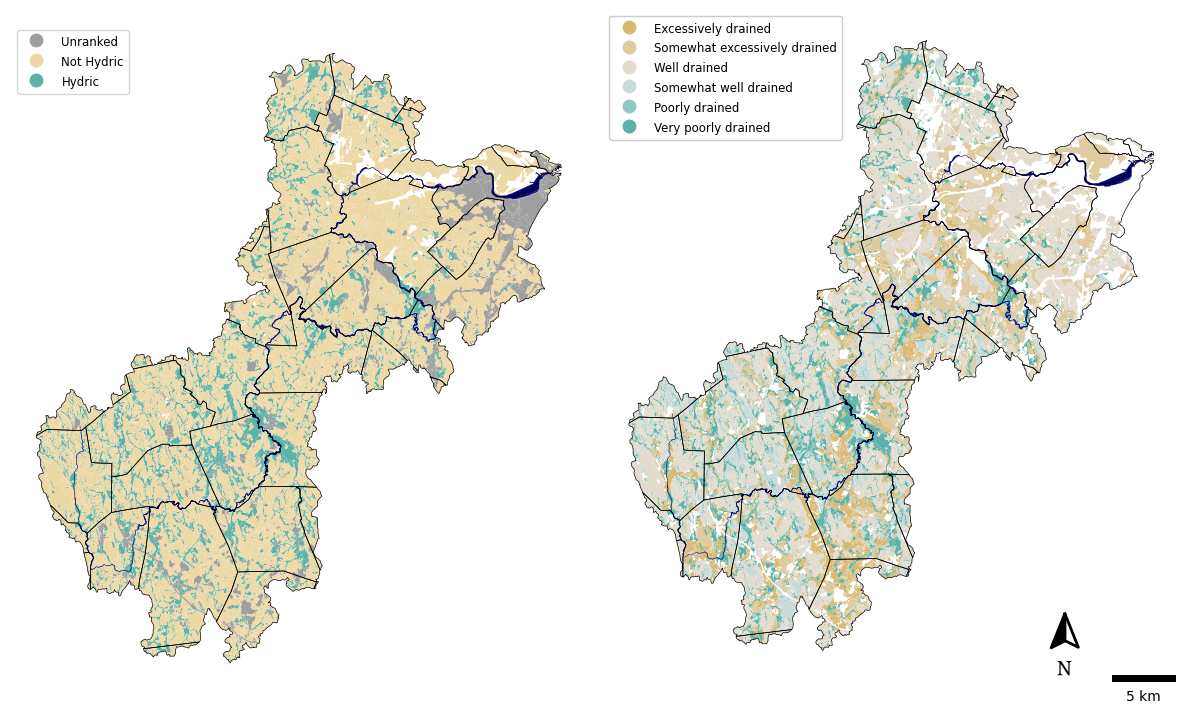

In [357]:
#Soil drainage and hydric soils map
fig, ax=plt.subplots(1,2,figsize=(12,8),width_ratios=[1,1],layout='tight')

Soils.plot(ax=ax[0],column='Hydric_Code',cmap=OWN_cmap,legend=True,legend_kwds={'loc':'upper left'})
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='black',linewidth=0.5)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')
leg1 = ax[0].get_legend()
new_legtxt = ['Unranked','Not Hydric','Hydric']
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
    eb.set_size(fontsize=8.5)

# Drainage classes
Soils.to_crs(epsg=26986).plot(ax=ax[1],column='Drain_Code',cmap=my_cmap5,legend=True,legend_kwds={'loc':'upper left','framealpha':1})
leg1 = ax[1].get_legend()
new_legtxt = ['Excessively drained','Somewhat excessively drained','Well drained','Somewhat well drained','Poorly drained',
              'Very poorly drained','No Data']

#Fixing legend entries (because of recoding from earlier)
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
    eb.set_size(fontsize=8.5)

towns.to_crs(epsg=26986).boundary.plot(ax=ax[1], color='black',linewidth=0.5)
Charles.plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1],color='#060270',linewidth=0.4)
ax[1].add_artist(ScaleBar(1,location='lower right'))
ax[1].set_axis_off()
add_north_arrow(ax=ax[1],scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)

plt.savefig("Output Maps/Hydric and Drainage for publication.png",transparent=True,dpi=300,bbox_inches='tight')

# EJ Pops

In [210]:
# Import EJ population data and census tract boundaries
EJPops=gpd.read_file('../../Raw_Data/EJ Data/EJ_POLY.shp').clip(CRW)
CT=gpd.read_file('../../Raw_Data/CensusBoundaries/CENSUS2020BLOCKGROUPS_POLY.shp').clip(CRW)

<IPython.core.display.HTML object>

In [211]:
# Determine average 2021 canopy for each 'level' of EJ (the number of criteria met)
EJpops=EJPops.dissolve('EJ_CRITE_1')
EJStats=pd.DataFrame(rasterstats.zonal_stats(EJpops, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=EJpops.index)
EJStats

<IPython.core.display.HTML object>

min   max       mean   count  median
EJ_CRITE_1                                      
1           1.0  98.0  37.690166  162742    28.0
2           1.0  92.0  17.658578   16689    12.0
3           1.0  85.0  12.390785    3603     8.0

In [212]:
# Compare to overall stats from watershed
CRWStats=pd.DataFrame(rasterstats.zonal_stats(CRW.dissolve(), "../../Working_Data/TCC2021.tif",stats="count min mean max median"))
CRWStats

<IPython.core.display.HTML object>

min   max       mean   count  median
0  1.0  98.0  53.692368  886934    60.0

In [219]:
#https://github.com/mikhailsirenko/bivariate-choropleth/blob/main/bivariate-choropleth.ipynb
# Bivariate Chloropleth

# Combine datasets into single gdf
EJTCC=pd.DataFrame(rasterstats.zonal_stats(CT, "../../Working_Data/TCC2021.tif",stats="mean"),index=CT.index)
EJPops['GEOID_Fix']=EJPops['GEOID'].map(str)
EJ_TCC=pd.merge(CT.join(EJTCC),EJPops.drop(columns='geometry'),left_on='GEOID20',right_on='GEOID_Fix',how='outer')
EJ_TCC.to_file('../../Working_Data/EJ TCC.geojson')

<IPython.core.display.HTML object>

In [156]:
#https://github.com/mikhailsirenko/bivariate-choropleth/blob/main/bivariate-choropleth.ipynb
# Bivariate Chloropleth

# Combine datasets into single gdf
#TCC=rioxarray.open_rasterio("../../Working_Data/TCC2021.tif")
#TCC=TCC.rio.clip(CRW.geometry)
#TCC=vectorize(TCC.astype('float32'))
#EJ=EJPops[['EJ_CRITE_1','geometry']]
#EJ_TCC=TCC.sjoin(EJ,predicate='within',how='left')
#EJ_TCC.to_file('../../Working_Data/EJ TCC.geojson')

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\geocube\vector.py:62: UserWarning: The array has no name. Column name defaults to _data
  warnings.warn("The array has no name. Column name defaults to _data")


In [215]:
EJ_TCC=gpd.read_file('../../Working_Data/EJ TCC.geojson').clip(CRW)

<IPython.core.display.HTML object>

In [221]:
# Bin TCC variaible
TCCbins=[0,25,50,75,100]
EJ_TCC['TCC_Class'] = pd.cut(EJ_TCC['mean'], bins=TCCbins, include_lowest=True)
EJ_TCC['TCC_Class'] = EJ_TCC['TCC_Class'].astype('str')

# Recode TCC bins to 1,2,3,4
x_class_codes = np.arange(1, len(TCCbins))
d = dict(zip(EJ_TCC['TCC_Class'].value_counts().sort_index().index, x_class_codes))
EJ_TCC['TCC_Class'] = EJ_TCC['TCC_Class'].replace(d)

# Recode EJ classes to A,B,C,D

y_class_codes = ['A', 'B', 'C','D']
d = {np.nan: 'A',1: 'B',2:'C',3:'D'}
EJ_TCC['EJ_Class'] = EJ_TCC['EJ_CRITE_1'].replace(d)

# Combine x and y codes to create Bi_Class
EJ_TCC['Bi_Class'] = EJ_TCC['TCC_Class'].astype('str') + EJ_TCC['EJ_Class']
#EJ_TCC=EJ_TCC[~np.isin(EJ_TCC['Bi_Class'],['nanA','nanB','nanC','nanD'])]

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

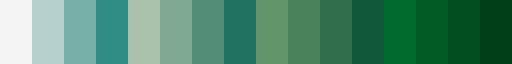

In [228]:
#https://jakobzhao.github.io/storymap/assets/color.html
biv = ['#f3f3f3','#b6d1cd','#77afa9','#2e8e86',
       '#aac4ac','#7fa991','#538d77','#20725f',
       '#629769','#498259','#306d49','#12583a',
       '#006a2b','#005b24','#004d1e','#003e18']
biv_cmap = mpl.colors.ListedColormap(biv)
biv_cmap

<IPython.core.display.HTML object>

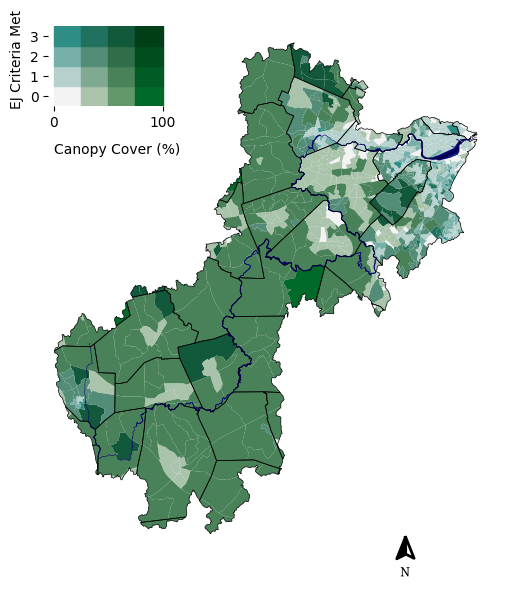

In [229]:
# Map EJ populations
fig,ax=plt.subplots(figsize=(6,8))
EJ_TCC.plot(ax=ax,column='Bi_Class',cmap=biv_cmap,legend=False,categorical=True)
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)

img2 = fig # refer to the main figure
ax2 = fig.add_axes([0.15, 0.75, 0.2, 0.1]) 
alpha = 1 

ax2.axvspan(xmin=0, xmax=0.25, ymin=0, ymax=0.25, alpha=alpha, color=biv[0])
ax2.axvspan(xmin=0, xmax=0.25, ymin=0.25, ymax=0.5, alpha=alpha, color=biv[1])
ax2.axvspan(xmin=0, xmax=0.25, ymin=0.5, ymax=.75, alpha=alpha, color=biv[2])
ax2.axvspan(xmin=0, xmax=0.25, ymin=0.75, ymax=1, alpha=alpha, color=biv[3])

ax2.axvspan(xmin=.25, xmax=0.5, ymin=0, ymax=0.25, alpha=alpha, color=biv[4])
ax2.axvspan(xmin=.25, xmax=0.5, ymin=0.25, ymax=0.5, alpha=alpha, color=biv[5])
ax2.axvspan(xmin=.25, xmax=0.5, ymin=0.5, ymax=.75, alpha=alpha, color=biv[6])
ax2.axvspan(xmin=.25, xmax=0.5, ymin=0.75, ymax=1, alpha=alpha, color=biv[7])

ax2.axvspan(xmin=.5, xmax=0.75, ymin=0, ymax=0.25, alpha=alpha, color=biv[8])
ax2.axvspan(xmin=.5, xmax=0.75, ymin=0.25, ymax=0.5, alpha=alpha, color=biv[9])
ax2.axvspan(xmin=.5, xmax=0.75, ymin=0.5, ymax=.75, alpha=alpha, color=biv[10])
ax2.axvspan(xmin=.5, xmax=0.75, ymin=0.75, ymax=1, alpha=alpha, color=biv[11])

ax2.axvspan(xmin=.75, xmax=1, ymin=0, ymax=0.25, alpha=alpha, color=biv[12])
ax2.axvspan(xmin=.75, xmax=1, ymin=0.25, ymax=0.5, alpha=alpha, color=biv[13])
ax2.axvspan(xmin=.75, xmax=1, ymin=0.5, ymax=.75, alpha=alpha, color=biv[14])
ax2.axvspan(xmin=.75, xmax=1, ymin=0.75, ymax=1, alpha=alpha, color=biv[15])

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.text(s='Canopy Cover (%)', x=0, y=-0.6)
ax2.text(s='EJ Criteria Met', x=-0.4, y=0, rotation=90)
ax2.set_xticks([0,1],labels=['0','100'])
ax2.set_yticks([0.125,0.375,0.625,0.875],labels=['0','1','2','3'])

ax.add_artist(ScaleBar(1,location='lower left',bbox_to_anchor=(1300,80),length_fraction=0.2,font_properties={'size':9},box_alpha=0))
ax.axis('off')
add_north_arrow(ax=ax,scale=0.4,ylim_pos=0.0,xlim_pos=0.8,text_scaler=3, text_yT=-3)

fig.savefig('Output Maps/EJ TCC for publication.png',transparent=True,dpi=300,bbox_inches='tight')

# Future Forest Scenarios from New England Landscape Futures

In [102]:
# https://www.mass.gov/doc/healthy-soils-action-plan-2023/download and New England Landscape Futures data from Harvard forest

<IPython.core.display.HTML object>

In [ ]:
# Reproject all the New England Landscape Futures Data
scenarios=glob.glob('../../Raw_Data/NELF/*.tif')
dst_crs = 'EPSG:26986'
for fp in scenarios:
    with rio.open(fp) as src:
    
        transform, width, height = calculate_default_transform(src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })
        with rio.Env(CHECK_DISK_FREE_SPACE="NO"):
            with rio.open(fp[:-4]+'Reprojected.tif', 'w', **kwargs) as dst:
                for i in range(1, src.count + 1):
                    reproject(
                        source=rio.band(src, i),
                        destination=rio.band(dst, i),
                        src_transform=src.transform,
                        src_crs=src.crs,
                        dst_transform=transform,
                        dst_crs=dst_crs,
                        resampling=Resampling.nearest)

In [ ]:
# Import 2020 data and 2060 data and clip to watershed
CC20,trans=mask(rio.open('../../Raw_Data/NELF/cc_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
GA20,trans=mask(rio.open('../../Raw_Data/NELF/ga_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
GG20,trans=mask(rio.open('../../Raw_Data/NELF/gg_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
RT20,trans=mask(rio.open('../../Raw_Data/NELF/rt_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
YC20,trans=mask(rio.open('../../Raw_Data/NELF/yc_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)

CC60,trans=mask(rio.open('../../Raw_Data/NELF/cc_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
GA60,trans=mask(rio.open('../../Raw_Data/NELF/ga_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
GG60,trans=mask(rio.open('../../Raw_Data/NELF/gg_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
RT60,trans=mask(rio.open('../../Raw_Data/NELF/rt_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
YC60,trans=mask(rio.open('../../Raw_Data/NELF/yc_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)

In [ ]:
#Key for coding in NELF data: 
#1: High Density Development
#2: Low Density Development
#3: Unprotected Forest
#4: Conserved Forest
#5: Agriculture
#6: Other
#7: Water

In [ ]:
# Define own color schemes for mapping forest data only 
NELF_codes=[1,2,3,4,5,6,7]
NELF_colors=['#FFFFFF','#FFFFFF','#ABCD66','#5C8944','#FFFFFF','#FFFFFF','#060270']
NELF_cmap = mpl.colors.LinearSegmentedColormap.from_list('NELF', NELF_colors, N=7)

In [ ]:
# Compare 2020 and 2060 protected and unprotected forest and water
fig, ax=plt.subplots(1,2,figsize=(12,8),width_ratios=[1,1],layout='tight')
show(RT20,ax=ax[0],cmap=NELF_cmap,vmin=1,vmax=7,extent=full_extent)
ax[0].axis('off')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#ABCD66', marker='o',markersize=12, label='Forest, Unprotected')
l4 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5C8944', marker='o',markersize=12, label='Forest, Conserved')
l7 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#060270', marker='o',markersize=12, label='Water')
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0],color='black',linewidth=0.5)
ax[0].legend(handles=[l3,l4,l7],loc='upper left',fontsize=12)

show(RT60,ax=ax[1],cmap=NELF_cmap,vmin=1,vmax=7,extent=full_extent)
ax[1].axis('off')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#ABCD66', marker='o',markersize=12, label='Forest, Unprotected')
l4 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5C8944', marker='o',markersize=12, label='Forest, Conserved')
l7 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#060270', marker='o',markersize=12, label='Water')
towns.to_crs(epsg=26986).boundary.plot(ax=ax[1],color='black',linewidth=0.5)
ax[1].legend(handles=[l3,l4,l7],loc='upper left',fontsize=12)
add_north_arrow(ax=ax[1],scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax[1].add_artist(ScaleBar(1,'m',location='lower right'))

fig.savefig('Output Maps/NELF RT forests 20_60.png',bbox_inches='tight',transparent=True,dpi=300)

In [ ]:
# Statistics pulled from above map
unique, counts20 = np.unique(RT20.data, return_counts=True)
uf20=counts20[2]*900*2.47105381/10000
pf20=counts20[3]*900*2.47105381/10000
uf60=counts60[2]*900*2.47105381/10000
pf60=counts60[3]*900*2.47105381/10000
print('in 2020, there were '+str(uf20)+' acres of unprotected forests and '+str(pf20)+' acres of protected forests')
unique, counts60 = np.unique(RT60.data, return_counts=True)
print('by 2060, there is expected to be '+str(uf60)+' acres of unprotected forests and '+str(pf60)+' acres of protected forests')
print('delta unprotected='+str(uf60-uf20)+'\ndelta protected='+str(pf60-pf20))
print('delta unprotected='+str((uf60-uf20)/uf20*100)+'\ndelta protected='+str((pf60-pf20)/pf60*100))

In [ ]:
# Look at statistics by town
forstats20=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns,'../../Raw_Data/NELF/rt_01Reprojected.tif',stats="count",categorical=True),index=Charles_Towns.index)
forstats20=forstats20[[3,4]]
forstats60=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns,'../../Raw_Data/NELF/rt_05Reprojected.tif',stats="count",categorical=True),index=Charles_Towns.index)
forstats60=forstats60[[3,4]]
forstats=forstats20.join(forstats60,rsuffix='.60',lsuffix='.20')
forstats['del3']=forstats['3.60']-forstats['3.20']
forstats['del4']=forstats['4.60']-forstats['4.20']
forstats['per3']=100*forstats['del3']/forstats['3.20']
forstats['per4']=100*forstats['del4']/forstats['4.20']
forstats.sort_values('per3')

# Impervious Surface

In [ ]:
# Mask data from NLCD (2021)
with rio.open('../../Raw_Data/NLCD/NLCD_2021_Impervious_L48_20230630_gFaEArJ6Oh9dOXkwqx9r.tiff') as src:
    out_meta = src.meta
    out_image, out_transform = rio.mask.mask(src,
                                             shapes=CRW.to_crs(rio.open('../../Raw_Data/NLCD/NLCD_2021_Impervious_L48_20230630_gFaEArJ6Oh9dOXkwqx9r.tiff').crs).geometry, crop=True)


    profile = src.profile
    profile["height"] = out_image.shape[1]
    profile["width"] = out_image.shape[2]
    profile["transform"] = out_transform


    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open("../../Working_Data/NLCD2021_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

#Reproject data from NLCD (2021)
dst_crs = 'EPSG:26986'

with rio.open("../../Working_Data/NLCD2021_masked.tif") as src:

    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    with rio.Env(CHECK_DISK_FREE_SPACE="NO"):
        with rio.open("../../Working_Data/NLCD2021.tif", 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)

# Mask data from NLCD (2008)
with rio.open('../../Raw_Data/NLCD/NLCD_2008_Impervious_L48_20210604_gFaEArJ6Oh9dOXkwqx9r.tiff') as src:
    out_meta = src.meta
    out_image, out_transform = rio.mask.mask(src,
                                             shapes=CRW.to_crs(rio.open('../../Raw_Data/NLCD/NLCD_2008_Impervious_L48_20210604_gFaEArJ6Oh9dOXkwqx9r.tiff').crs).geometry, crop=True)


    profile = src.profile
    profile["height"] = out_image.shape[1]
    profile["width"] = out_image.shape[2]
    profile["transform"] = out_transform


    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open("../../Working_Data/NLCD2008_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

#Reproject data from NLCD (2008)
dst_crs = 'EPSG:26986'

with rio.open("../../Working_Data/NLCD2008_masked.tif") as src:

    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    with rio.Env(CHECK_DISK_FREE_SPACE="NO"):
        with rio.open("../../Working_Data/NLCD2008.tif", 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)
     

In [ ]:
# Import reprojected and masked data
NLCD2008,trans=mask(rio.open('../../Working_Data/NLCD2008.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
NLCD2021,trans=mask(rio.open('../../Working_Data/NLCD2021.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)

In [ ]:
# 2008 impervious surface data statistics
ImpStats=pd.DataFrame(rasterstats.zonal_stats(CRW_Upper.dissolve(), "../../Working_Data/NLCD2008.tif",stats="count min mean max median"),index=CRW.index)
ImpStats

In [ ]:
# 2021 impervious surface data statistics
ImpStats=pd.DataFrame(rasterstats.zonal_stats(CRW_Upper.dissolve(), "../../Working_Data/NLCD2021.tif",stats="count min mean max median"),index=CRW.index)
ImpStats

In [ ]:
# Plot 2008 and 2021 impervious surface and the change
fig,ax=plt.subplots(1,3,figsize=(18,8),layout='tight')

hidden=ax[0].imshow(NLCD2008[0,:,:],cmap='Greys',extent=full_extent)
cbar=fig.colorbar(hidden,orientation='horizontal',shrink=0.6,aspect=15,pad=0.05,format='%4i%%')
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label='Impervious Surface (2008)',fontsize=20)
show(NLCD2008,ax=ax[0],cmap='Greys',extent=full_extent)
CRW.boundary.plot(ax=ax[0],color='black',linewidth=0.5)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')

hidden=ax[1].imshow(NLCD2021[0,:,:],cmap='Greys',extent=full_extent)
cbar=fig.colorbar(hidden,orientation='horizontal',shrink=0.6,aspect=15,pad=0.05,format='%4i%%')
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label='Impervious Surface (2021)',fontsize=20)
show(NLCD2021,ax=ax[1],cmap='Greys',extent=full_extent)
CRW.boundary.plot(ax=ax[1],color='black',linewidth=0.5)
Charles.plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1],color='#060270',linewidth=0.4)
ax[1].axis('off')

hidden=ax[2].imshow((NLCD2021-NLCD2008)[0,:,:],cmap='BrBG_r',extent=full_extent,vmin=-100,vmax=100)
cbar=fig.colorbar(hidden,orientation='horizontal',shrink=0.6,aspect=15,pad=0.05)
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label='Change in Impervious Surface',fontsize=20)
show(NLCD2021-NLCD2008,ax=ax[2],cmap='BrBG_r',extent=full_extent,vmin=-100,vmax=100)
CRW.boundary.plot(ax=ax[2],color='black',linewidth=0.5)
ax[2].axis('off')
towns.to_crs(epsg=26986).boundary.plot(ax=ax[2], color='black',linewidth=0.5)
Charles.plot(ax=ax[2],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[2],color='#060270',linewidth=0.4)
add_north_arrow(ax=ax[2],scale=0.6,ylim_pos=0.05,xlim_pos=0.80,text_scaler=4, text_yT=-2)
ax[2].add_artist(ScaleBar(1,location='lower right',height_fraction=0.014,font_properties={'size':16}))
fig.savefig('Output Maps/Impervious Surfaces.png',dpi=300,transparent=True,bbox_inches='tight')

# Heat

In [ ]:
# Obtain relevant scaling data so the data can be rescaled for just the watershed (and no the whole MAPC area)
scale=pd.DataFrame(rasterstats.zonal_stats(CRW, "../../Raw_Data/Heat/LST_index_normwater_mapc.tif",stats="count min mean max median"),index=CRW.index)

In [ ]:
# Read heat index data and vectorize it. Also extract top and lower half of index in region
heat=rioxarray.open_rasterio("../../Raw_Data/Heat/LST_index_normwater_mapc.tif")
heat=heat.rio.clip(CRW.geometry)
heat=vectorize(heat.astype('float32'))
heat['_data']=(heat['_data']-scale['min'][0])/(scale['max'][0]-scale['min'][0])
cool=heat[heat['_data']<0.5].dissolve(as_index=False)
hot=heat[heat['_data']>=0.5].dissolve(as_index=False)

In [ ]:
# Tree canopy stats for the heat data
heat_stats=pd.DataFrame(rasterstats.zonal_stats(hot,'../../Working_Data/TCC2021.tif',stats="mean"),index=cool.index)
cool_stats=pd.DataFrame(rasterstats.zonal_stats(cool,'../../Working_Data/TCC2021.tif',stats="mean"),index=cool.index)
print('The hottest 50% of areas have ',heat_stats['mean'][0],'% tree canopy on average')
print('The coolest 50% of areas have ',cool_stats['mean'][0],'% tree canopy on average')

In [ ]:
# Maps comparing tree canopy and hottest half of the watershed
fig,ax=plt.subplots(1,2,figsize=(12,6),layout='tight')

hidden = ax[0].imshow(TCC2021[0,:,:],cmap=my_greens,extent=plot_extent,alpha=1,vmin=0,vmax=100)
show(TCC2021,cmap=my_greens,ax=ax[0],extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='black',linewidth=0.5)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')
plt.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05,label='Tree Canopy Coverage')

towns.to_crs(epsg=26986).boundary.plot(ax=ax[1], color='black',linewidth=0.5)
Charles.plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1],color='#060270',linewidth=0.4)
hot.plot(ax=ax[1],color='#fd8d3c')
ax[1].add_artist(ScaleBar(1,location='lower right'))
ax[1].axis('off')
ax[1].set_ylim([852000,911600])
add_north_arrow(ax=ax[1],scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
plt.savefig('Output Maps/Heat Ranking and Trees.png',transparent=True,dpi=300,bbox_inches='tight')

# Open Space

In [333]:
# Import open space data
OS = gpd.read_file('../../Raw_Data/OpenSpace/OPENSPACE_POLY.shp').clip(CRW)
print('There is ',OS.dissolve().geometry[0].area*2.47105381/10000,' acres of open space in the Charles River Watershed')
print('That represents ',100*OS.dissolve().geometry[0].area/CRW.dissolve().geometry[0].area,'% of the total area of the watershed')

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)


There is  45276.79866574955  acres of open space in the Charles River Watershed
That represents  22.759025504176194 % of the total area of the watershed


In [ ]:
#Discovered one property with missing ownership data and manually assigned to unknown and updated Rail Trail ownership
OS.loc[30889,'OWNER_TYPE']='F'
OS[OS.SITE_NAME=='Upper Charles River Rail Trail'].loc['OWNER_TYPE']='M'

## Level of Protection

In [79]:
# Recode level of protection and create custom color map
LOP_recode={
    'P': 'A',
    'T': 'B',
    'L': 'C',
    'N': 'D',
    'X': 'E'
}
OS['LOP_Recode']=OS['LEV_PROT'].map(LOP_recode)

LOP_palette = {'A':'#238b45','B':'#74c476','C':'#c7e9c0','D':'#9B4832','E':'#6E756B'}
LOP_cmap = mpl.colors.ListedColormap([LOP_palette[b] for b in ['A','B','C','D','E']])

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

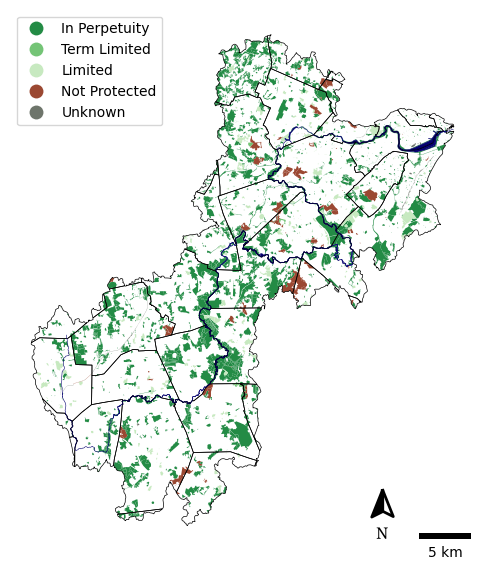

In [80]:
# Map open space by level of protection 
fig,ax=plt.subplots(figsize=(6,8))

OS.plot(ax=ax,column='LOP_Recode',legend=True,cmap=LOP_cmap,legend_kwds={'loc':'upper left'})
leg1 = ax.get_legend()
new_legtxt = ['In Perpetuity','Term Limited','Limited','Not Protected','Unknown']

#Fixing legend entries (because of earlier recoding)
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
    
ax.axis('off')
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.8,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)


fig.savefig('Output Maps/Open Space Protection for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [81]:
# Percent of open space at each level of protection
LOP=OS.dissolve('LEV_PROT')[['geometry']]
(LOP.geometry.area*2.47105381/10000)/(LOP.geometry.area*2.47105381/10000).sum()*100

<IPython.core.display.HTML object>


LEV_PROT
L     9.940619
N     8.320464
P    80.971617
T     0.301471
X     0.465830
dtype: float64

In [82]:
# Area of open space within each level of protection 
(LOP.geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


LEV_PROT
L     4500.793891
N     3767.239772
P    36661.355796
T      136.496247
X      210.912959
dtype: float64

In [83]:
# Area in acres of tree canopy in each open space by level of protection 
LOPStats=pd.DataFrame(rasterstats.zonal_stats(LOP, "../../Working_Data/TCC2021.tif",stats="mean"),index=LOP.index)
LOPStats['mean']/100*(LOP.geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


LEV_PROT
L     2186.407639
N     2046.367136
P    25236.200477
T       80.503649
X       94.745193
dtype: float64

In [84]:
# Area of total open space canopy that is on each type of open space by level of protection 
LOPStats['mean']/100*(LOP.geometry.area*2.47105381/10000)/((LOPStats['mean']/100*(LOP.geometry.area*2.47105381/10000)).sum())*100

<IPython.core.display.HTML object>


LEV_PROT
L     7.375493
N     6.903089
P    85.130245
T     0.271566
X     0.319608
dtype: float64

In [85]:
# Mean canopy coverage on open space by each level of protection 
LOPStats['mean']

<IPython.core.display.HTML object>


LEV_PROT
L    48.578266
N    54.320066
P    68.835972
T    58.978654
X    44.921466
Name: mean, dtype: float64

## Ownership

In [ ]:
# Recoding ownership and defining custom colormap
OWN_recode={
    'M':'A',
    'P':'B',
    'S':'C',
    'L':'D',
    'F':'E',
    'N':'F',
    'B':'G',
    'O':'H',
    'X':'I'
}
OS['OWN_Recode']=OS['OWNER_TYPE'].map(OWN_recode)

OWN_palette = {'A':'#5BB3A8','B':'#cfa155','C':'#258880','D':'#74c476','E':'#015F56','F':'#995d13','G':'#238b45','H':'#7b7373','I':'#281D19'}
OWN_cmap = mpl.colors.ListedColormap([OWN_palette[b] for b in ['A','B','C','D','E','F','G','H','I']])

In [ ]:
# Ownership map for open space
fig,ax=plt.subplots(figsize=(6,8))
OS.plot(ax=ax,column='OWN_Recode',legend=True,cmap=OWN_cmap,legend_kwds={'loc':'upper left','fontsize':8})
leg1 = ax.get_legend()
new_legtxt = ['Municipal','Private for Profit','State','Land Trust','Federal','Private Nonprofit','Public Nonprofit','Other','Unknown']

#Fixing legend entries (because of recoding)
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
ax.axis('off')

ax.add_artist(ScaleBar(1,location='lower right'))
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.8,text_scaler=3, text_yT=-3)
fig.savefig('Output Maps/Open Space Ownership for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
# Area of each ownership type in acres
(OS.dissolve('OWNER_TYPE')['geometry'].area*2.47105381/10000)

In [ ]:
# Percent of open space in each ownership type
(OS.dissolve('OWNER_TYPE')['geometry'].area*2.47105381/10000)/sum(OS.dissolve('OWNER_TYPE')['geometry'].area*2.47105381/10000)*100

In [ ]:
# acres of tree canopy on open space by ownership type
OSStats=pd.DataFrame(rasterstats.zonal_stats(OS.dissolve('OWNER_TYPE'), "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=OS.dissolve('OWNER_TYPE').index)
OSStats['mean']*OS.dissolve('OWNER_TYPE')['geometry'].area*2.47105381/10000*(1/100)

In [ ]:
# percent of open space tree canopy on each type of open space by ownership type
(OSStats['mean']*OS.dissolve('OWNER_TYPE')['geometry'].area*2.47105381/10000*(1/100))/((OSStats['mean']*OS.dissolve('OWNER_TYPE')['geometry'].area*2.47105381/10000*(1/100)).sum())*100

In [ ]:
# average canopy coverage by ownership type 
OSStats['mean']

## Statistics

In [ ]:
# Overall open space canopy statistics
OSStats=pd.DataFrame(rasterstats.zonal_stats(OS.dissolve(), "../../Working_Data/TCC2021.tif",stats="mean"))
OSStats['mean']

# Parcel Data

In [299]:
# I clipped this in ArcGIS because was so large and had to combine east and west
Parcels=gpd.read_file('../../Working_Data/ParcelsClipped_fromstate.shp')

<IPython.core.display.HTML object>

In [300]:
# Extracting unique use codes from the parcel data
codes=Parcels.USE_CODE.unique()
codes=codes[codes != np.array(None)]
codes.sort()
np.savetxt("../../Working_Data/ParcelsUseCodes.csv", codes,fmt='%s', delimiter=",")
#https://www.mass.gov/doc/property-type-classification-codes-non-arms-length-codes-and-sales-report-spreadsheet/download

<IPython.core.display.HTML object>

In [301]:
# Reading in my land use categories and public/private crosswalks and using them through a merge
public=pd.read_csv('../../Working_Data/ParcelsUseCodes_CONVERTER.csv')
genCats=pd.read_csv('../../Working_Data/ParcelsUseCodes_CONVERTER_GeneralCats.csv')
Parcels_wPublic=Parcels.merge(public, on='USE_CODE')
Parcels_GEN=Parcels.merge(genCats, on='USE_CODE')

<IPython.core.display.HTML object>

In [302]:
# Fixing bad geometries in parcel data
bad_geos_indexes=Parcels_wPublic[~Parcels_wPublic.geometry.is_valid].index
for i in bad_geos_indexes:
    Parcels_wPublic.geometry[i]=make_valid(Parcels_wPublic.geometry[i])

bad_geos_indexes=Parcels_GEN[~Parcels_GEN.geometry.is_valid].index
for i in bad_geos_indexes:
    Parcels_GEN.geometry[i]=make_valid(Parcels_GEN.geometry[i])

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Local\Temp\ipykernel_6572\3383886537.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Parcels_wPublic.geometry[i]=make_valid(Parcels_wPublic.geometry[i])
C:\Users\Chad\AppData\Local\Temp\ipykernel_6572\3383886537.py:

In [303]:
# Recode and define own palette
Land_recode={
    'Residential':'A',
    'Governmental':'B',
    'Recreational':'C',
    'Other':'D',
    'Industrial':'E',
    'Commercial':'F',
    'Institutional':'G',
    'Agricultural':'H',
    'Forest':'I',
    'Open Space':'J',
    'ROW':'K'
}
Parcels_GEN['Land_Recode']=Parcels_GEN['GenCats'].map(Land_recode)

palette = {'A':'#543005',
           'B':'#0e726a',
           'C':'#006d2c',
           'D':'#e3e3e3',
           'E':'#c1c1c1',
           'F':'#7c4809',
           'G':'#b5e3dc',
           'H':'#c48a38',
           'I':'#757575',
           'J':'#41ab5d',
           'K':'#00441b'}
new_cmap = mpl.colors.ListedColormap([palette[b] for b in ['A','B','C','D','E','F','G','H','I','J','K']])

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

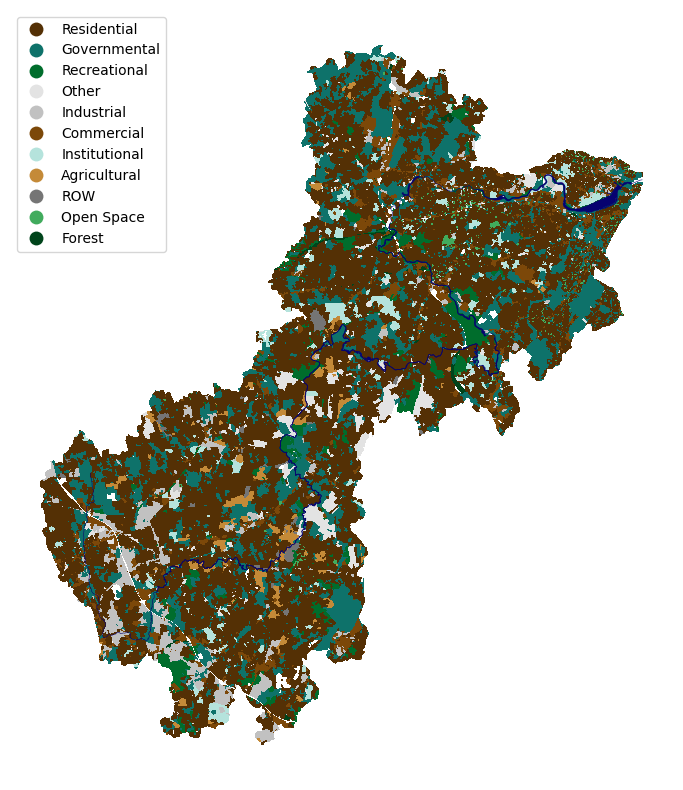

In [304]:
# Map underlying land use category data
fig,ax=plt.subplots(figsize=(10,10))
Parcels_GEN.plot(ax=ax,column='Land_Recode',antialiased=False,cmap=new_cmap,legend=True,legend_kwds={'loc':'upper left'})
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)

leg1 = ax.get_legend()
new_legtxt = ['Residential','Governmental','Recreational','Other','Industrial',
                                                           'Commercial','Institutional','Agricultural','ROW','Open Space','Forest']

#Fixing legend entries (because of recoding)
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])

ax.axis('off')
fig.savefig('Output Maps/Land Categories.png',dpi=300,transparent=True,bbox_inches='tight')

In [305]:
# Dissolve parcel data by general land use categories
Parcels_GEN=Parcels_GEN.dissolve('GenCats')

<IPython.core.display.HTML object>

In [306]:
# Average canopy coverage by land use type over time 
ParGENStats=pd.DataFrame(rasterstats.zonal_stats(Parcels_GEN, "../../Working_Data/TCC2021.tif",stats="mean"),index=Parcels_GEN.index)
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(Parcels_GEN, "../../Working_Data/TCC"+year+".tif",stats="mean"),index=Parcels_GEN.index)
    ParGENStats=ParGENStats.join(stats,rsuffix=year)
ParGENStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageCanopy over time by Land Use.csv')

<IPython.core.display.HTML object>

In [307]:
# Clean canopy coverage by land use type over time data
CanParData=pd.read_csv('../../Working_Data/AverageCanopy over time by Land Use.csv')
CanParData=pd.melt(CanParData,id_vars='GenCats',var_name='Year')
for i in CanParData.index:
    CanParData.loc[i,'Year']=CanParData['Year'].iloc[i][-4:]

<IPython.core.display.HTML object>

In [308]:
# Further reorganize data using pivot table
CanParData=CanParData.pivot(columns='GenCats',index='Year')

<IPython.core.display.HTML object>

In [309]:
# Calculate area of each land use category
areas=(Parcels_GEN.geometry.area*2.47105381/10000)
areas

<IPython.core.display.HTML object>


GenCats
Agricultural      3946.599934
Commercial       10356.120258
Forest            1790.940654
Governmental     38949.389932
Industrial        8603.923033
Institutional     6568.473583
Open Space        2773.543608
Other             6065.554419
ROW                569.627279
Recreational      7360.799406
Residential      97070.570011
dtype: float64

In [310]:
# Convert canopy coverage percent to acres
for col in CanParData.columns:
    CanParData[col]=CanParData[col]*areas[col[1]]/100

<IPython.core.display.HTML object>

In [311]:
# Extract data of interest
CanParData=CanParData.value[['Residential','Governmental','Recreational','Other','Industrial','Commercial','Institutional',
                             'Agricultural','Forest','Open Space','ROW']]

<IPython.core.display.HTML object>

In [312]:
# Percent change by land use type
100*(CanParData.T['2021']-CanParData.T['2008'])/CanParData.T['2008']

<IPython.core.display.HTML object>


GenCats
Residential     -6.408536
Governmental    -5.444623
Recreational    -4.098023
Other           -6.077956
Industrial      -9.116877
Commercial      -6.974028
Institutional   -4.518356
Agricultural    -6.304118
Forest          -6.602309
Open Space      -9.293299
ROW              0.433550
dtype: float64

<IPython.core.display.HTML object>

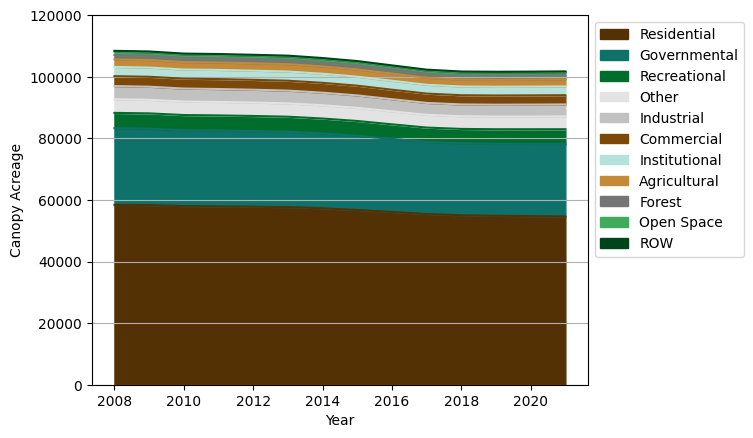

In [313]:
#Canopy acreage by land use type over time
ax=CanParData.plot.area(stacked=True,legend=True,cmap=new_cmap)
ax.set(ylabel='Canopy Acreage',xlabel='Year')
ax.set_ylim([0,120000])
legend=ax.get_legend()
legend.set_title('')
ax.grid(which='major',axis='y',visible=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig('Output Maps/Canopy by Land use type.png',dpi=300,transparent=True,bbox_inches='tight')

In [314]:
# dissolve parcels by public and private ownership
Parcels_dissolved=Parcels_wPublic.dissolve('Public',as_index=False)

<IPython.core.display.HTML object>

In [316]:
# Add back in missing areas in watershed as unknown
missing=CRW.dissolve().overlay(Parcels_dissolved.dissolve(),how='difference').overlay(rivers.dissolve(),how='difference').dissolve()
fix=Parcels_dissolved[Parcels_dissolved.Public=='X'].overlay(missing,how='union',keep_geom_type=True).dissolve().geometry
Par=Parcels_dissolved[Parcels_dissolved.Public!='X']
Par=pd.concat([Par, fix])
Par['Public']=['R','U','X']
Par=Par[['Public','geometry']].reset_index(drop=True)
bad_geos_indexes=Par[~Par.geometry.is_valid].index
for i in bad_geos_indexes:
    Par.geometry[i]=make_valid(Par.geometry[i])

<IPython.core.display.HTML object>

In [369]:
# Save off corrected parcel data
Par.to_file('../../Working_Data/Parcels 2024_corrected.shp')

<IPython.core.display.HTML object>

In [317]:
# Do this but for each subregion 
Parcels_U=Par.clip(CRW_Upper)
Parcels_M=Par.clip(CRW_Middle)
Parcels_L=Par.clip(CRW_Lower)

<IPython.core.display.HTML object>

In [318]:
# Average tree canopy coverage (%) by ownership for the upper subregion 
ParStats_U=pd.DataFrame(rasterstats.zonal_stats(Parcels_U, "../../Working_Data/TCC2008.tif",stats="count min mean max median"),index=Parcels_U.index)
ParStats_U

<IPython.core.display.HTML object>

min   max       mean   count  median
0  1.0  99.0  62.672356  272482    72.0
2  1.0  99.0  46.557589   34156    40.0
1  1.0  99.0  70.433668   82547    85.0

In [319]:
# As area of tree canopy
(ParStats_U['mean']/100)*Parcels_U.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    37990.504307
2     3522.467718
1    13015.459017
dtype: float64

In [320]:
#Average canopy coverage (%) for just the Middle subregion by ownership 
ParStats_M=pd.DataFrame(rasterstats.zonal_stats(Parcels_M, "../../Working_Data/TCC2008.tif",stats="count min mean max median"),index=Parcels_M.index)
ParStats_M

<IPython.core.display.HTML object>

min    max       mean   count  median
0  1.0  100.0  63.320014  218900    73.0
2  1.0   99.0  46.964882   30042    43.0
1  1.0   99.0  66.654226   76900    82.0

In [321]:
# As area of tree canopy
(ParStats_M['mean']/100)*Parcels_M.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    30901.497002
2     3141.104974
1    11856.200540
dtype: float64

In [322]:
# For lower subregion
ParStats_L=pd.DataFrame(rasterstats.zonal_stats(Parcels_L, "../../Working_Data/TCC2008.tif",stats="count min mean max median"),index=Parcels_L.index)
ParStats_L

<IPython.core.display.HTML object>

min   max       mean   count  median
0  1.0  98.0  35.271283  105108    30.0
2  1.0  98.0  27.892092   39543    20.0
1  1.0  98.0  40.660417   41121    31.0

In [323]:
# as area of tree canopy
(ParStats_L['mean']/100)*Parcels_L.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    8308.522484
2    2464.910947
1    3808.155300
dtype: float64

In [324]:
# tree canopy cover (%) for whole watershed
ParStats=pd.DataFrame(rasterstats.zonal_stats(Parcels_dissolved, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=Parcels_dissolved.Public)
ParStats

<IPython.core.display.HTML object>

min   max       mean   count  median
Public                                      
R       1.0  97.0  54.301283  597288    61.0
U       1.0  97.0  59.638088  200955    74.0
X       2.0  95.0  40.010156   18610    32.0

In [325]:
my_palette = {'R':'#ecd8a5','U':'#5bb2a8','X':'#828181'}
my_cmap10 = mpl.colors.ListedColormap([my_palette[b] for b in ['R','U','X']])

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

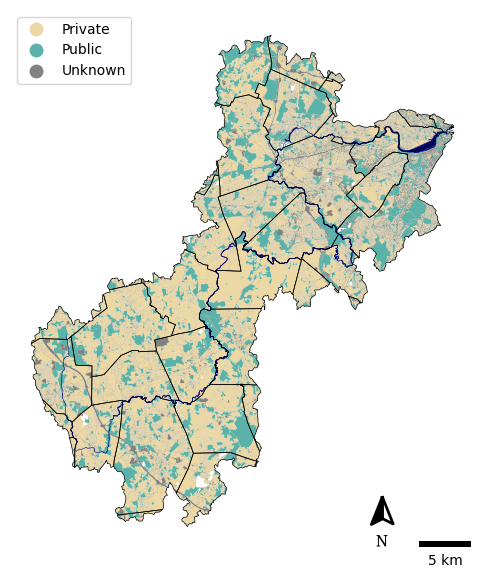

In [326]:
# Plot of ownership for the watershed
fig,ax=plt.subplots(figsize=(6,8))

Par.plot(ax=ax,column='Public',cmap=my_cmap10,legend=True,legend_kwds={'loc':'upper left'})
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)

leg1 = ax.get_legend()
new_legtxt = ['Private','Public','Unknown']

#Fixing legend entries
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
ax.axis('off')

add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
fig.savefig('Output Maps/Parcel public private for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [327]:
# Stats of tree canopy coverage by ownership type for each town
Parcels_towns_dissolved=Par.sjoin(Charles_Towns).sort_values('name')
Parcels_towns_stats=pd.DataFrame(rasterstats.zonal_stats(Par, "../../Working_Data/TCC2021.tif",stats="mean"),index=Par.index)

<IPython.core.display.HTML object>

In [328]:
# Converts town codes to town names
town_dict={
    10: 'Arlington',
    14: 'Ashland',  
    25:'Bellingham',  
    26: 'Belmont',  
    35:'Boston',  
    46:'Brookline',  
    49: 'Cambridge',  
    73:'Dedham',  
    78: 'Dover',  
    99:'Foxborough', 
    101:'Franklin', 
    136: 'Holliston', 
    138: 'Hopedale',
    139:'Hopkinton', 
    155:'Lexington', 
    157:'Lincoln', 
    175:'Medfield', 
    177:'Medway', 
    179:'Mendon', 
    185:'Milford', 
    187:'Millis', 
    198:'Natick', 
    199:'Needham', 
    207:'Newton', 
    208:'Norfolk', 
    269:'Sherborn',
    274:'Somerville', 
    307:'Walpole', 
    308:'Waltham', 
    314:'Watertown', 
    315:'Wayland', 
    317:'Wellesley', 
    333:'Weston', 
    335:'Westwood', 
    350:'Wrentham'
}

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

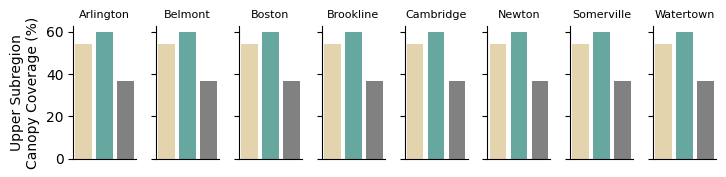

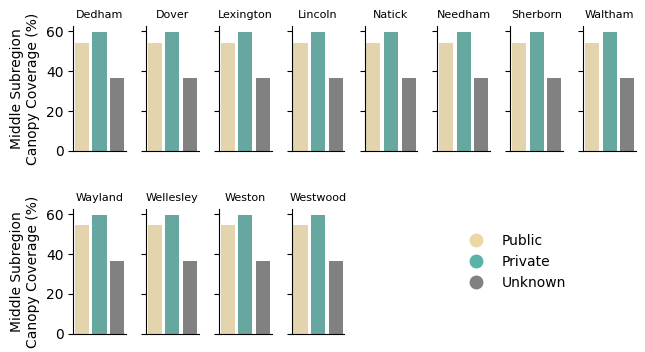

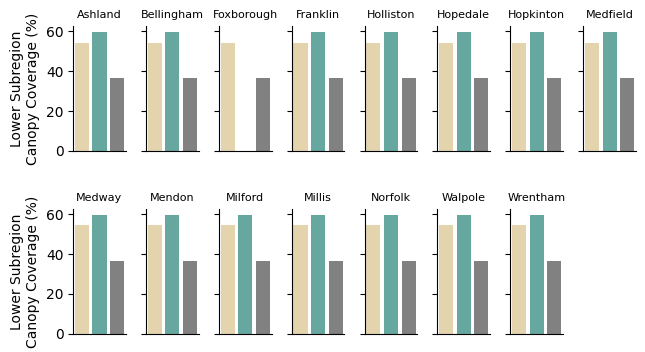

In [329]:
# Join stats and clean them to make a plot
Parcels_statsbytown=Parcels_towns_dissolved.join(Parcels_towns_stats)[['Public','TOWN_ID','mean']]
Parcels_statsbytown=Parcels_statsbytown.replace({"TOWN_ID": town_dict})
Parcels_statsU=Parcels_statsbytown[np.isin(Parcels_statsbytown['TOWN_ID'],Upper)]
Parcels_statsM=Parcels_statsbytown[np.isin(Parcels_statsbytown['TOWN_ID'],Middle)]
Parcels_statsL=Parcels_statsbytown[np.isin(Parcels_statsbytown['TOWN_ID'],Lower)]

ax=sns.catplot(
    data=Parcels_statsL.sort_values(['TOWN_ID','Public']), x="Public", y="mean", col="TOWN_ID",
    kind="bar", height=2.25, aspect=.4,hue='Public',orient='v',palette=my_palette,col_wrap=8
)
ax.set_titles(col_template="{col_name}",size=8)
ax.set(ylabel='Upper Subregion\nCanopy Coverage (%)',xlabel='')
plt.gca().set_xticks([])
plt.savefig('Output Maps/Canopy by Town Lower (2021).png',dpi=300,transparent=True,bbox_inches='tight')

ax=sns.catplot(
    data=Parcels_statsM.sort_values(['TOWN_ID','Public']), x="Public", y="mean", col="TOWN_ID",
    kind="bar", height=2, aspect=.4,hue='Public',orient='v',palette=my_palette,col_wrap=8
)
ax.set_titles(col_template="{col_name}",size=8)
ax.set(ylabel='Middle Subregion\nCanopy Coverage (%)',xlabel='')
l4 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#ecd8a5', markeredgecolor=(1,1,1,0), marker='o',markersize=10, label='Public')
l5 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5bb2a8', markeredgecolor=(1,1,1,0), marker='o',markersize=10, label='Private')
l6 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#828181', markeredgecolor=(1,1,1,0), marker='o',markersize=10, label='Unknown')
plt.gca().legend(handles=[l4,l5,l6],bbox_to_anchor=(3, .9),frameon=False)
plt.gca().set_xticks([])
plt.savefig('Output Maps/Canopy by Town Middle (2021).png',dpi=300,transparent=True,bbox_inches='tight')

ax=sns.catplot(
    data=Parcels_statsU.sort_values(['TOWN_ID','Public']), x="Public", y="mean", col="TOWN_ID",
    kind="bar", height=2, aspect=.4,hue='Public',orient='v',palette=my_palette,col_wrap=8
)
ax.set_titles(col_template="{col_name}",size=8)
ax.set(ylabel='Lower Subregion\nCanopy Coverage (%)',xlabel='')
plt.gca().set_xticks([])
plt.savefig('Output Maps/Canopy by Town Upper (2021).png',dpi=300,transparent=True,bbox_inches='tight')

# Tree Ordinances

In [296]:
# Merge tree ordinance data onto towns
Ords=Charles_Towns.sort_values(by='name')
Ords=Ords.merge(pd.read_csv('../../Raw_Data/Tree Bylaw Review_Watershedwide - NEW.csv'),left_on='name',right_on='Town')

<IPython.core.display.HTML object>

In [55]:
Ords.columns

<IPython.core.display.HTML object>


Index(['geometry', 'STATEFP20', 'COUNTYFP20', 'COUSUBFP20', 'COUSUBNS20',
       'GEOID20', 'LSAD20', 'CLASSFP20', 'MTFCC20', 'CNECTAFP20', 'NECTAFP20',
       'NCTADVFP20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20',
       'INTPTLON20', 'TOWN20', 'TOWN_ID', 'FIPS_STCO2', 'COUNTY20', 'TYPE',
       'FOURCOLOR', 'AREA_ACRES', 'SQ_MILES', 'POP1960', 'POP1970', 'POP1980',
       'POP1990', 'POP2000', 'POP2010', 'POP2020', 'POPCH10_20', 'HOUSING20',
       'SHAPE_AREA', 'SHAPE_LEN', 'name', 'Town', 'NVSA', 'MVP_Status',
       'Policies', 'Last_Updated', 'Private', 'Private_Beyond_New', 'Mature',
       'Maintenance'],
      dtype='object')

In [56]:
Ords[Ords['Policies']!='N']

<IPython.core.display.HTML object>

geometry STATEFP20 COUNTYFP20  \
0   POLYGON ((225744.129 906942.559, 225726.729 90...        25        017   
1   MULTIPOLYGON (((205145.95 887224.44, 205159.02...        25        017   
2   POLYGON ((204841.234 876045.756, 204820.991 87...        25        021   
3   POLYGON ((225430.141 903637.497, 225403.9 9036...        25        017   
4   POLYGON ((236842.961 902590.409, 236839.966 90...        25        025   
5   POLYGON ((227620.361 894886.662, 227580.605 89...        25        021   
6   MULTIPOLYGON (((235209.088 902562.48, 235212.8...        25        017   
8   POLYGON ((216925.529 891414.008, 216926.942 89...        25        021   
9   POLYGON ((217697.567 870003.218, 217729.199 87...        25        021   
10  POLYGON ((209905.981 875838.682, 209912.376 87...        25        021   
11  POLYGON ((209503.596 882399.411, 209481.55 882...        25        017   
12  POLYGON ((199881.91 874025.919, 199876.121 874...        25        027   
13  MULTIPOLYGON (((200785.839 883151.563, 200764....        25        017   
14  MULTIPOLYGON (((225012.905 907949.846, 224993....        25        017   
17  POLYGON ((208249.939 880547.022, 208545.259 87...        25        021   
18  POLYGON ((200040.365 872515.011, 200048.222 87...        25        027   
23  POLYGON ((227379.406 901114.582, 227344.704 90...        25        017   
26  POLYGON ((234627.669 903734.357, 234623.021 90...        25        017   
30  POLYGON ((214001.538 899212.765, 214109.723 89...        25        017   
31  MULTIPOLYGON (((216520.276 891047.497, 216519....        25        021   
32  POLYGON ((217907.289 905481.732, 218106.652 90...        25        017   
34  MULTIPOLYGON (((204585.799 865060.082, 204607....        25        021   

   COUSUBFP20 COUSUBNS20     GEOID20 LSAD20 CLASSFP20 MTFCC20 CNECTAFP20  ...  \
0       01605   00619393  2501701605     43        T1   G4040        715  ...   
1       02130   00619394  2501702130     43        T1   G4040        715  ...   
2       04930   00618315  2502104930     43        T1   G4040        715  ...   
3       05070   00618216  2501705070     43        T1   G4040        715  ...   
4       07000   00619463  2502507000     25        C5   G4040        715  ...   
5       09175   00619456  2502109175     43        T1   G4040        715  ...   
6       11000   00619396  2501711000     25        C5   G4040        715  ...   
8       17405   00618319  2502117405     43        T1   G4040        715  ...   
9       24820   00618320  2502124820     43        T1   G4040        715  ...   
10      25172   00618321  2502125172     25        C5   G4040        715  ...   
11      30700   00618225  2501730700     43        T1   G4040        715  ...   
12      30945   00618366  2502730945     43        T1   G4040        715  ...   
13      31085   00619400  2501731085     43        T1   G4040        715  ...   
14      35215   00619401  2501735215     43        T1   G4040        715  ...   
17      39975   00619458  2502139975     43        T1   G4040        715  ...   
18      40255   00618371  2502740255     43        T1   G4040        715  ...   
23      45560   00619408  2501745560     25        C5   G4040        715  ...   
26      62535   00619409  2501762535     25        C5   G4040        715  ...   
30      73790   00618243  2501773790     43        T1   G4040        715  ...   
31      74175   00618332  2502174175     43        T1   G4040        715  ...   
32      77255   00618245  2501777255     43        T1   G4040        715  ...   
34      82315   00618334  2502182315     43        T1   G4040        715  ...   

          name        Town NVSA           MVP_Status  Policies Last_Updated  \
0    Arlington   Arlington  NaN       MVP Designated         Y       2016.0   
1      Ashland     Ashland  NaN  2020 Planning Grant         D          NaN   
2   Bellingham  Bellingham    Y  2020 Planning Grant        OS       2020.0   
3      Belmont     Belmont  NaN  2020 Planning Grant         Y        

In [57]:
# Define own custom palettes for map making below
pol_recode={
    'Y': 'A',
    'D': 'D',
    'OS': 'B',
    'O': 'C',
    'N': 'E'
}
Ords['Policies_Recode']=Ords['Policies'].map(pol_recode)
Ord_palette = {'A':'#006d2c','B':'#238b45','C':'#74c476','D':'#5bb2a8'}
Ord_cmap = mpl.colors.ListedColormap([Ord_palette[b] for b in ['A','B','C','D']])

<IPython.core.display.HTML object>

In [58]:
# Making own binning for last updated map
bins = [1970,2002,2003,2016,2024]
labels = ['A','B','C','D']
Ords['binned'] = pd.cut(Ords['Last_Updated'], bins=bins, labels=labels)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

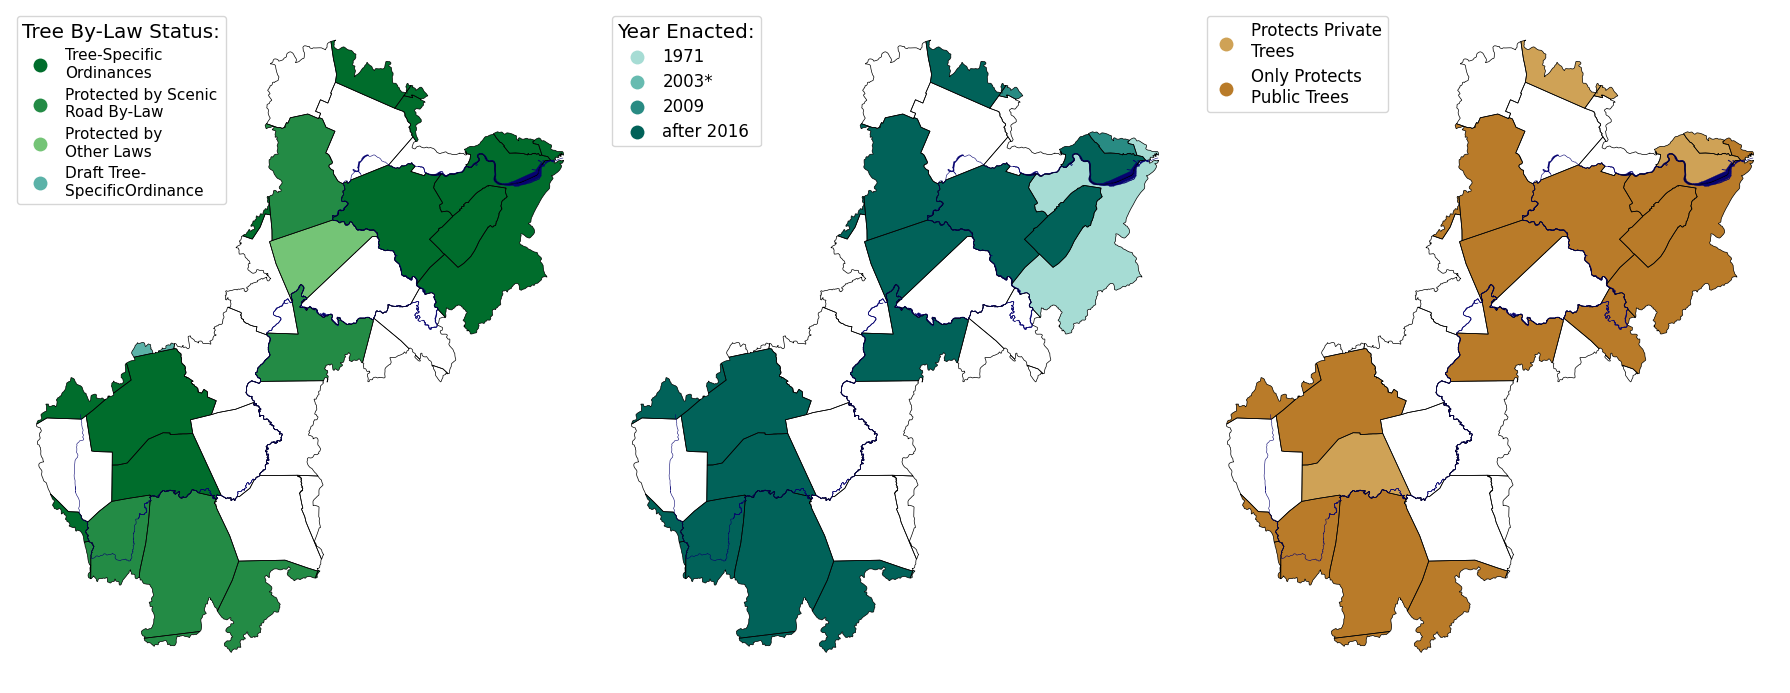

In [59]:
fig,ax=plt.subplots(1,3,figsize=(18,8),layout='tight')
Ords[Ords.Policies_Recode!='E'].plot(ax=ax[0],column='Policies_Recode',cmap=Ord_cmap,legend=True,legend_kwds={'loc':'upper left'})
leg1 = ax[0].get_legend()
new_legtxt = ['Tree-Specific\nOrdinances','Protected by Scenic\nRoad By-Law','Protected by\nOther Laws','Draft Tree-\nSpecificOrdinance','No Tree By-Law']

towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='black',linewidth=0.5)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')

#Fixing legend entries (because of recoding from earlier)
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
    eb.set_size(fontsize=11)
leg1.set_title('Tree By-Law Status:',prop={'size':'x-large'})

Ords.plot(ax=ax[1],column='binned',legend=True,cmap='BrBG',norm=mpl.colors.BoundaryNorm(np.linspace(-7, 4, 36),ncolors=256),vmin=0,vmax=3,legend_kwds={'loc':'upper left'})
towns.to_crs(epsg=26986).boundary.plot(ax=ax[1], color='black',linewidth=0.5)
Charles.plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1],color='#060270',linewidth=0.4)
ax[1].axis('off')
leg1 = ax[1].get_legend()
new_legtxt = ['1971','2003*','2009','after 2016']
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
    eb.set_size(fontsize=12)
leg1.set_title('Year Enacted:',prop={'size':'x-large'})

Ords.plot(ax=ax[2],column='Private',legend=True,cmap='BrBG_r',norm=mpl.colors.BoundaryNorm(np.linspace(-12, 4, 256),ncolors=256),vmin=0,vmax=3,legend_kwds={'loc':'upper left'})
towns.to_crs(epsg=26986).boundary.plot(ax=ax[2], color='black',linewidth=0.5)
Charles.plot(ax=ax[2],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[2],color='#060270',linewidth=0.4)
ax[2].axis('off')

leg1 = ax[2].get_legend()
new_legtxt = ['Protects Private\nTrees','Only Protects\nPublic Trees']
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
    eb.set_size(fontsize=12)

fig.savefig('Output Maps/Ordinances and Policies.png',dpi=300,bbox_inches='tight',transparent=True)

# Natural Valley Storage Area

In [297]:
# Load NVSA data
NVSA=gpd.read_file('../../Raw_Data/NVSA V2/naturalvalleystoragewetlands.shp').to_crs(epsg=26986)

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore

In [148]:
Roads=gpd.read_file('../../Raw_Data/Roads/EOTMAJROADS_ARC.shp').clip(CRW)
IS=Roads[Roads.ADMIN_TYPE==1].dissolve('RT_NUMBER',as_index=False)
IS['labelloc']=IS.representative_point()

<IPython.core.display.HTML object>

In [149]:
# Zonal stats on NVSA data and tree canopy
NVSA_stats=pd.DataFrame(rasterstats.zonal_stats(NVSA.dissolve(), "../../Working_Data/TCC2021.tif",stats="mean"))

<IPython.core.display.HTML object>

In [151]:
NVSA_stats['mean']

<IPython.core.display.HTML object>


0    65.396524
Name: mean, dtype: float64

In [150]:
# Area of trees in NVSA
NVSA_stats['mean']/100*NVSA.dissolve().geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    4998.014132
dtype: float64

<IPython.core.display.HTML object>

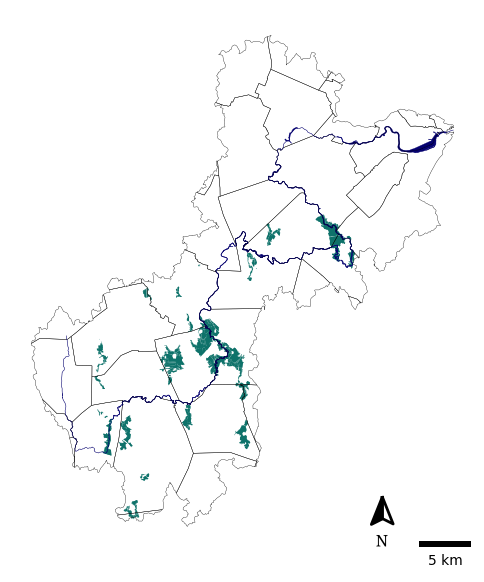

In [152]:
# Map of NVSA
fig,ax=plt.subplots(figsize=(6,8))
NVSA.to_crs(epsg=26986).plot(ax=ax,color='#0e726a',legend=False)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.25)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)
#IS.to_crs(epsg=26986).plot(ax=ax,color='#757575',linewidth=1.5)

#l1 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#0e726a', marker='o',markersize=12, label='NVSA Wetlands')
#l2 = mpl.lines.Line2D([], [], color='#757575',linewidth=2,label='Interstates')
#ax.legend(handles=[l1,l2],fontsize=10,loc='upper left')

#for row in IS[['RT_NUMBER','labelloc']].iterrows():
#    ax.annotate('I-'+row[1]['RT_NUMBER'],(row[1]['labelloc'].x,row[1]['labelloc'].y),
#                horizontalalignment='left',fontsize=8,color='black',
#                path_effects=[mpl.patheffects.withStroke(linewidth=1, foreground="white")])

ax.add_artist(ScaleBar(1,location='lower right'))
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.axis('off')
fig.savefig('Output Maps/NVSA.png',dpi=300,transparent=True,bbox_inches='tight')

In [ ]:
# Load dam data and only select those that are state or federally regulated
Dams=gpd.read_file('../../Raw_Data/Dams/DAMS_PT.shp',driver='pyogrio').clip(CRW)
Dams=Dams[(Dams.REGAUTH!='Non-Jurisdictional - Other') | (Dams.HAZCODE!='N/A')]

In [ ]:
# Select specific dams to highlight
Target_Dams=Dams[(Dams.DAMNAME=='Charles River Dam At South Natick')|(Dams.DAMNAME=='Watertown Dam')|(Dams.DAMNAME=='Eagle Dam')]
Removed_Dams=Dams[Dams.DAMNAME=='Old Mill Dam']

In [ ]:
# Produce map
fig,ax=plt.subplots(figsize=(6,8))
Dams.to_crs(epsg=26986).plot(ax=ax,color='#5bb2a8',legend=False)
Target_Dams.to_crs(epsg=26986).plot(ax=ax,color='#0e726a',marker='*',markersize=400,legend=False)
Removed_Dams.to_crs(epsg=26986).plot(ax=ax,color='#7c4809',marker='x',markersize=100,linewidth=3,legend=False)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=1)
Tribs.to_crs(epsg=26986).plot(ax=ax,color='#015AA7',linewidth=0.7)
ax.add_artist(ScaleBar(1,location='lower right'))
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)

Target_Dams['coords'] = Target_Dams['geometry'].apply(lambda x: x.centroid.coords[:])
Target_Dams['coords'] = [coords[0] for coords in Target_Dams['coords']]
j=1
for idx, row in Target_Dams.iterrows():
    ax.annotate(text=str(j), xy=row['coords'],
                horizontalalignment='center',fontsize=7,color='white',
                path_effects=[mpl.patheffects.withStroke(linewidth=1.5, foreground="black")])
    j+=1

l1 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5bb2a8', marker='o',markeredgecolor=(1,1,1,0),markersize=5, label='Dams')
l2 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#0e726a', marker='*',markeredgecolor=(1,1,1,0),markersize=9, label='Dams Targeted for Removal')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#7c4809', marker='x',markeredgecolor='#7c4809',markersize=5, label='Dam Removed 2016')
ax.legend(handles=[l1,l2,l3],loc='upper left',fontsize=8)

ax.axis('off')
fig.savefig('Output Maps/Dams.png',dpi=300,transparent=True,bbox_inches='tight')

# BioMAP

In [348]:
Hab=gpd.read_file('../../Raw_Data/BioMAP/BM3_CORE_HABITAT.shp',driver='pyogrio').clip(CRW)
Land=gpd.read_file('../../Raw_Data/BioMAP/BM3_CRITICAL_NATURAL_LANDSCAPE.shp',driver='pyogrio').clip(CRW)
For=gpd.read_file('../../Raw_Data/BioMAP/BM3_CH_FOREST_CORE.shp',driver='pyogrio').clip(CRW)
Loc=gpd.read_file('../../Raw_Data/BioMAP/BM3_LOCAL_LANDSCAPES.shp',driver='pyogrio').clip(CRW)

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:194: RuntimeWarning: driver ESRI Shapefile does not support open option DRIVER
  result = ogr_read(
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:194: RuntimeWarning: driver ESRI Shapefile does not support open option DRIVER
  result = ogr_read(
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:194: RuntimeWarning: driver ESRI Shapefile does not support open option DRIVER
  result = ogr_read(
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:194: RuntimeWarning: driver ESRI Shapefile does not support open option DRIVER
  result = ogr_read(


<IPython.core.display.HTML object>

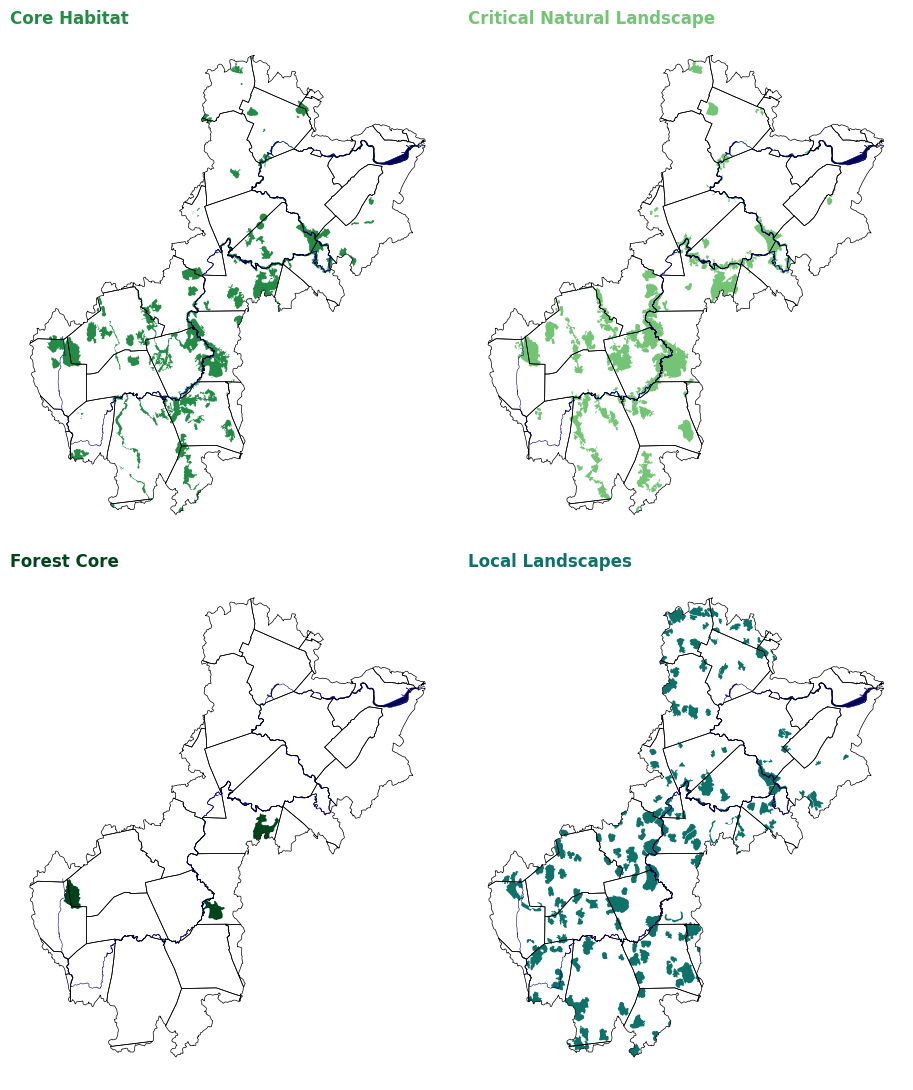

In [350]:
fig,ax=plt.subplots(2,2,figsize=(12,11),layout='tight')
Hab.plot(ax=ax[0,0],color='#238b45')
towns.boundary.plot(ax=ax[0,0],color='black',linewidth=0.5)
Charles.plot(ax=ax[0,0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0,0],color='#060270',linewidth=0.4)

Land.plot(ax=ax[0,1],color='#74c476')
towns.boundary.plot(ax=ax[0,1],color='black',linewidth=0.5)
Charles.plot(ax=ax[0,1],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0,1],color='#060270',linewidth=0.4)

For.plot(ax=ax[1,0],color='#00441b')
towns.boundary.plot(ax=ax[1,0],color='black',linewidth=0.5)
Charles.plot(ax=ax[1,0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1,0],color='#060270',linewidth=0.4)

Loc.plot(ax=ax[1,1],color='#0e726a')
towns.boundary.plot(ax=ax[1,1],color='black',linewidth=0.5)
Charles.plot(ax=ax[1,1],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1,1],color='#060270',linewidth=0.4)

ax[0,0].axis('off')
ax[1,0].axis('off')
ax[0,1].axis('off')
ax[1,1].axis('off')

ax[0,0].set_title('Core Habitat',ha='left',x=0,color='#238b45',weight='bold')
ax[0,1].set_title('Critical Natural Landscape',ha='left',x=0,color='#74c476',weight='bold')
ax[1,0].set_title('Forest Core',ha='left',x=0,color='#00441b',weight='bold')
ax[1,1].set_title('Local Landscapes',ha='left',x=0,color='#0e726a',weight='bold')
fig.savefig('Output Maps/BioMap3.png',dpi=300,transparent=True,bbox_inches='tight')

In [ ]:
# Identify intermittent streams
iStreams=rivers_arc[rivers_arc.ARC_CODE==5]

In [ ]:
# Map intermittent streams
fig,ax=plt.subplots(figsize=(6,8))
iStreams.plot(ax=ax,color='#5bb2a8')
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=.5)
Tribs.to_crs(epsg=26986).plot(ax=ax,color='#015AA7',linewidth=0.5)
ax.add_artist(ScaleBar(1,location='lower right'))
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.axis('off')

l1 = mpl.lines.Line2D([], [], color='#060270', label='Charles River')
l2 = mpl.lines.Line2D([], [], color='#015AA7', label='Tributaries')
l3 = mpl.lines.Line2D([], [], color='#5bb2a8', label='Intermittent Streams')
ax.legend(handles=[l1,l2,l3],loc='upper left',fontsize=8)

fig.savefig('Output Maps/Intermittent Streams.png',dpi=300,transparent=True,bbox_inches='tight')

# Overall Protection Map

In [331]:
# Tree Canopy under ordinances
Pub_Ords=Ords[(Ords['Policies']=='Y')&(Ords['Private']=='U')]
Pub_Protect=Par[Par.Public=='U'].clip(Pub_Ords).dissolve()
Pub_TCC,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),Pub_Protect.to_crs(epsg=26986).geometry,crop=True,filled=False)

Pri_Ords=Ords[(Ords['Policies']=='Y')&(Ords['Private']=='R')]
Pri_Protect=Par.clip(Pri_Ords).dissolve()
Pri_TCC,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),Pri_Protect.to_crs(epsg=26986).geometry,crop=True,filled=False)

<IPython.core.display.HTML object>

In [332]:
# Extent for mapping
Pri_extent=[Pri_Protect.dissolve().geometry.bounds['minx'][0],Pri_Protect.dissolve().geometry.bounds['maxx'][0],Pri_Protect.dissolve().geometry.bounds['miny'][0],Pri_Protect.dissolve().geometry.bounds['maxy'][0]]
Pub_extent=[Pub_Protect.dissolve().geometry.bounds['minx'][0],Pub_Protect.dissolve().geometry.bounds['maxx'][0],Pub_Protect.dissolve().geometry.bounds['miny'][0],Pub_Protect.dissolve().geometry.bounds['maxy'][0]]

<IPython.core.display.HTML object>

In [334]:
# Tree canopy on protected open space
P_OS=OS[OS['LEV_PROT']=='P']
POS_TCC,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),P_OS.to_crs(epsg=26986).geometry,crop=True,filled=False)
OS_extent=[P_OS.dissolve().geometry.bounds['minx'][0],P_OS.dissolve().geometry.bounds['maxx'][0],P_OS.dissolve().geometry.bounds['miny'][0],P_OS.dissolve().geometry.bounds['maxy'][0]]

<IPython.core.display.HTML object>

In [335]:
# Tree Canopy on NVSA land
NVSA_TCC,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),NVSA[NVSA.geometry!=None].to_crs(epsg=26986).geometry,crop=True,filled=False)
NVSA_extent=[NVSA.dissolve().geometry.bounds['minx'][0],NVSA.dissolve().geometry.bounds['maxx'][0],NVSA.dissolve().geometry.bounds['miny'][0],NVSA.dissolve().geometry.bounds['maxy'][0]]

<IPython.core.display.HTML object>

In [337]:
# Tree Canopy on Hydric Soils (Wetlands)
Wets=Soils[Soils['HYDRCRATNG']=='Yes']
Wets_TCC,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),Wets[Wets.geometry!=None].to_crs(epsg=26986).geometry,crop=True,filled=False)
Wets_extent=[Wets.dissolve().geometry.bounds['minx'][0],Wets.dissolve().geometry.bounds['maxx'][0],Wets.dissolve().geometry.bounds['miny'][0],Wets.dissolve().geometry.bounds['maxy'][0]]

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

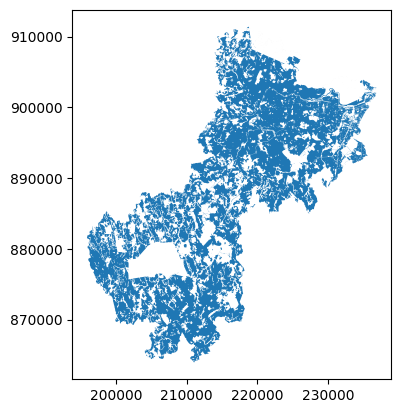

In [338]:
Protect_All=pd.concat([Pub_Protect, Pri_Protect,NVSA[NVSA.geometry!=None][['geometry']].dissolve(),P_OS[['geometry']].dissolve(),Wets[['geometry']].dissolve()]).dissolve()[['geometry']]
Protect_All.to_file('../../Working_Data/Protect All Areas.geojson')
Unprotect_All=CRW.dissolve().overlay(Protect_All,how='difference')
Unprotect_All.plot()
U_TCC,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),Unprotect_All.to_crs(epsg=26986).geometry,crop=True,filled=False)
U_extent=[Unprotect_All.dissolve().geometry.bounds['minx'][0],Unprotect_All.dissolve().geometry.bounds['maxx'][0],Unprotect_All.dissolve().geometry.bounds['miny'][0],Unprotect_All.dissolve().geometry.bounds['maxy'][0]]

In [344]:
# Define color scheme for unprotected canopy
colors7=['#f7fcf5','#089645','#007842'] 
my_greens2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap7',colors7,N=256)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

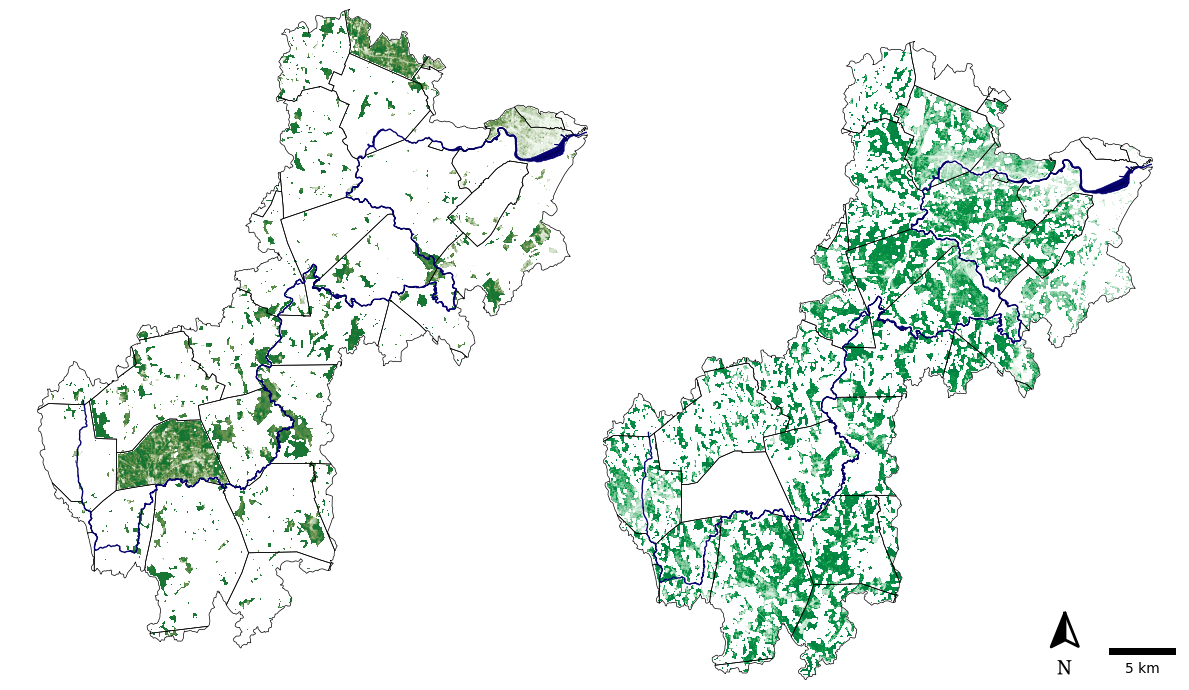

In [347]:
# Final protection map
fig,ax=plt.subplots(1,2,width_ratios=[1,1],figsize=(12,8),layout='tight')
hidden=ax[0].imshow(Wets_TCC[0,:,:],cmap=my_greens,extent=Wets_extent,vmin=0,vmax=100)
show(Pri_TCC,ax=ax[0],cmap=my_greens,extent=Pri_extent)
show(Pub_TCC,ax=ax[0],cmap=my_greens,extent=Pub_extent)
show(NVSA_TCC,ax=ax[0],cmap=my_greens,extent=NVSA_extent)
show(POS_TCC,ax=ax[0],cmap=my_greens,extent=OS_extent)
show(Wets_TCC,ax=ax[0],cmap=my_greens,extent=Wets_extent)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='black',linewidth=0.5)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.5)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=1)
ax[0].axis('off')

#cbar=fig.colorbar(hidden, cmap=my_greens,orientation='vertical',location='left',
 #               shrink=0.5,aspect=20,pad=0.05,format="%4i%%")

show(U_TCC,ax=ax[1],cmap=my_greens2,extent=U_extent,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[1], color='black',linewidth=0.5)
Charles.plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.5)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1],color='#060270',linewidth=1)
ax[1].axis('off')

ax[1].add_artist(ScaleBar(1,location='lower right'))
add_north_arrow(ax=ax[1],scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
fig.savefig('Output Maps/Protected Trees.png',dpi=300,transparent=True,bbox_inches='tight')

In [79]:
CRW_stats=pd.DataFrame(rasterstats.zonal_stats(CRW.dissolve(), "../../Working_Data/TCC2021.tif",stats="mean"))
CRW_stats['mean']/100*CRW.dissolve().geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    106815.581787
dtype: float64

In [81]:
P_stats=pd.DataFrame(rasterstats.zonal_stats(Protect_All.dissolve(), "../../Working_Data/TCC2021.tif",stats="mean"))
P_stats['mean']/100*Protect_All.dissolve().geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    44201.721939
dtype: float64

In [82]:
# Final amount of acres of trees that are protected 
(P_stats['mean']/100*Protect_All.geometry.area*2.47105381/10000)/(CRW_stats['mean']/100*CRW.dissolve().geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


0    0.413813
dtype: float64

# TNC Conservation Priority Data

In [108]:
# Load conservation priority data
cons_opps=gpd.read_file('../../Raw_Data/TNC_Cons/High Level Conservation Opp/High Priority Conservation Opportunities/High Priority Conservation Opportunities.shp').to_crs(epsg=26986)

<IPython.core.display.HTML object>

In [121]:
# Subset to only high priority conservation opportunities
HP_cons_opps=cons_opps[cons_opps.Priority=='High Priority']
HP_cons=HP_cons_opps.overlay(Protect_All.dissolve(),how='difference').dissolve()
CONS_TCC,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),HP_cons.to_crs(epsg=26986).geometry,crop=True,filled=False)
CONS_extent=[HP_cons.dissolve().geometry.bounds['minx'][0],HP_cons.dissolve().geometry.bounds['maxx'][0],HP_cons.dissolve().geometry.bounds['miny'][0],HP_cons.dissolve().geometry.bounds['maxy'][0]]

<IPython.core.display.HTML object>

In [122]:
# Acres of unprotected trees on these lands
HPCons_stats=pd.DataFrame(rasterstats.zonal_stats(HP_cons, "../../Working_Data/TCC"+'2021'+".tif",stats="count min mean max median"),index=HP_cons.index)

# acreage of trees of interest
HPCons_stats['mean']/100*(HP_cons.geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


0    7989.778079
dtype: float64

<IPython.core.display.HTML object>

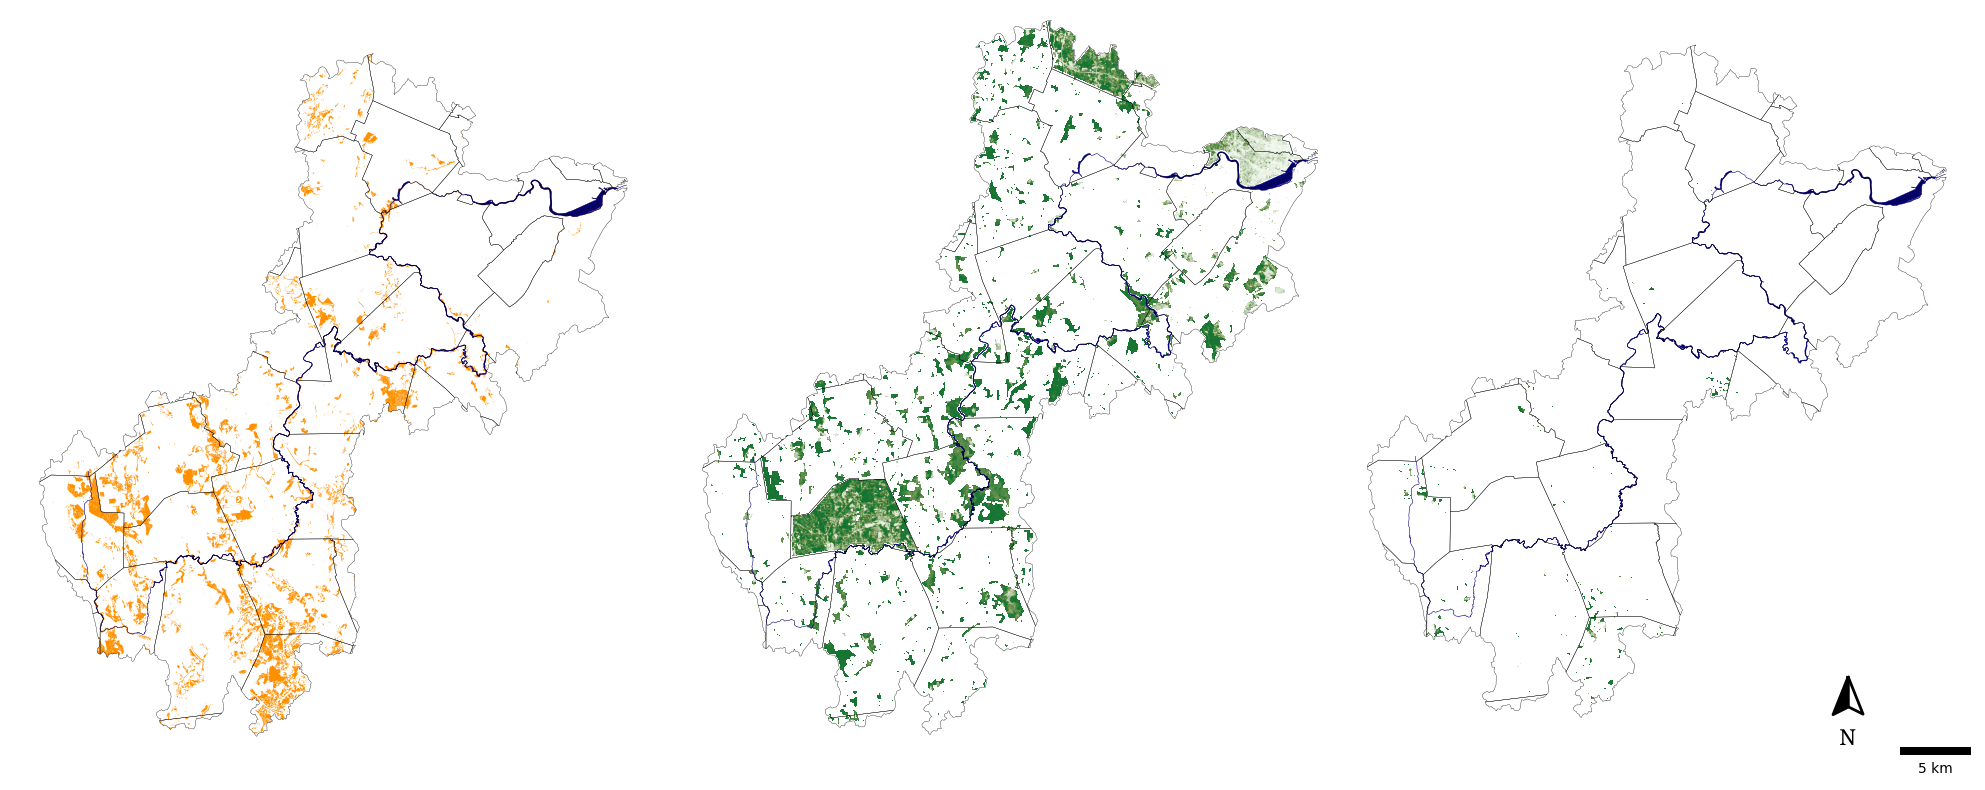

In [120]:
# Map high priority conservation opportunities against current protected tree canopy
fig,ax=plt.subplots(1,3,figsize=(20,8),layout='tight')

HP_cons_opps.plot(ax=ax[0],color='#ff9101',linewidth=0.25)
towns.boundary.plot(ax=ax[0],color='black',linewidth=0.25)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')

show(Pri_TCC,ax=ax[1],cmap=my_greens,extent=Pri_extent)
show(Pub_TCC,ax=ax[1],cmap=my_greens,extent=Pub_extent)
show(NVSA_TCC,ax=ax[1],cmap=my_greens,extent=NVSA_extent)
show(POS_TCC,ax=ax[1],cmap=my_greens,extent=OS_extent)
show(Wets_TCC,ax=ax[1],cmap=my_greens,extent=Wets_extent)
towns.boundary.plot(ax=ax[1],color='black',linewidth=0.25)
Charles.plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[1],color='#060270',linewidth=0.4)
ax[1].axis('off')

show(CONS_TCC,ax=ax[2],cmap=my_greens,extent=CONS_extent)
towns.boundary.plot(ax=ax[2],color='black',linewidth=0.25)
Charles.plot(ax=ax[2],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[2],color='#060270',linewidth=0.4)
ax[2].axis('off')
ax[2].add_artist(ScaleBar(1,location='lower right'))
add_north_arrow(ax=ax[2],scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
fig.savefig('Output Maps/High Priority Conservation Areas.png',dpi=300,transparent=True,bbox_inches='tight')

In [86]:
# Make copies of parcel data with just one ownership type
Private=Parcels_dissolved[Parcels_dissolved.Public=='R']
Public=Parcels_dissolved[Parcels_dissolved.Public=='U']
Unknown=Parcels_dissolved[Parcels_dissolved.Public=='X']

<IPython.core.display.HTML object>

In [87]:
# Figure out what ownership type exists on each conservation opportunity area
pub_cons_opp=HP_cons_opps.overlay(Public,how='intersection').dissolve()
pri_cons_opp=HP_cons_opps.overlay(Private,how='intersection').dissolve()
unk_cons_opp=HP_cons_opps.overlay(Unknown,how='intersection').dissolve()

<IPython.core.display.HTML object>

In [88]:
# Load and mask TCC data by each ownership type for the conservaiton priority zones
TCC2021_mask,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),HP_cons_opps.to_crs(epsg=26986).geometry,crop=True,filled=False)
TCC2021_pub,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),pub_cons_opp.to_crs(epsg=26986).geometry,crop=True,filled=False)
TCC2021_pri,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),pri_cons_opp.to_crs(epsg=26986).geometry,crop=True,filled=False)
TCC2021_unk,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),unk_cons_opp.to_crs(epsg=26986).geometry,crop=True,filled=False)
plot_extent=rio.plot.plotting_extent(rio.open('../../Working_Data/TCC2021.tif'))

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

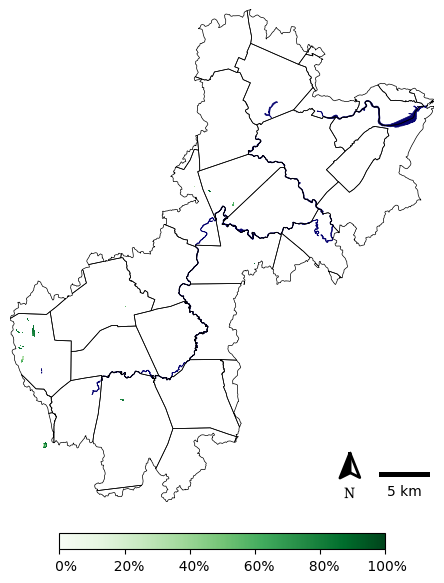

In [89]:
# Map the data for public ownership
f, ax = plt.subplots(figsize=(6,8))

hidden = ax.imshow(TCC2021_pub[0,:,:],cmap='Greens',extent=plot_extent,alpha=1,vmin=0,vmax=100)

show(TCC2021_pub,cmap='Greens',ax=ax,extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.clip(CRW).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.axis('off')

add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
f.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05)

f.savefig('Output Maps/2021 TCC conservation prio zones PUBLIC for publication.png',transparent=True,dpi=300,bbox_inches='tight')

<IPython.core.display.HTML object>

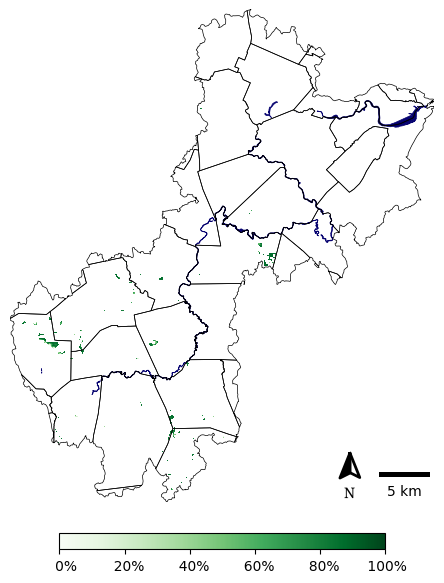

In [90]:
# map the data for private ownership 
f, ax = plt.subplots(figsize=(6,8))

hidden = ax.imshow(TCC2021_pri[0,:,:],cmap='Greens',extent=plot_extent,alpha=1,vmin=0,vmax=100)

show(TCC2021_pri,cmap='Greens',ax=ax,extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.clip(CRW).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.axis('off')

add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
f.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05)

f.savefig('Output Maps/2021 TCC conservation prio zones PRIVATE for publication.png',transparent=True,dpi=300,bbox_inches='tight')

<IPython.core.display.HTML object>

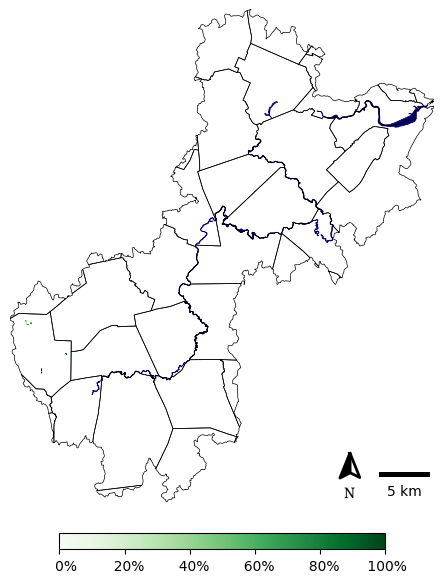

In [91]:
# Map the data for unknown ownership 
f, ax = plt.subplots(figsize=(6,8))

hidden = ax.imshow(TCC2021_unk[0,:,:],cmap='Greens',extent=plot_extent,alpha=1,vmin=0,vmax=100)

show(TCC2021_unk,cmap='Greens',ax=ax,extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.clip(CRW).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.axis('off')

add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
f.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05)

f.savefig('Output Maps/2021 TCC conservation prio zones UNKNOWN for publication.png',transparent=True,dpi=300,bbox_inches='tight')

<IPython.core.display.HTML object>

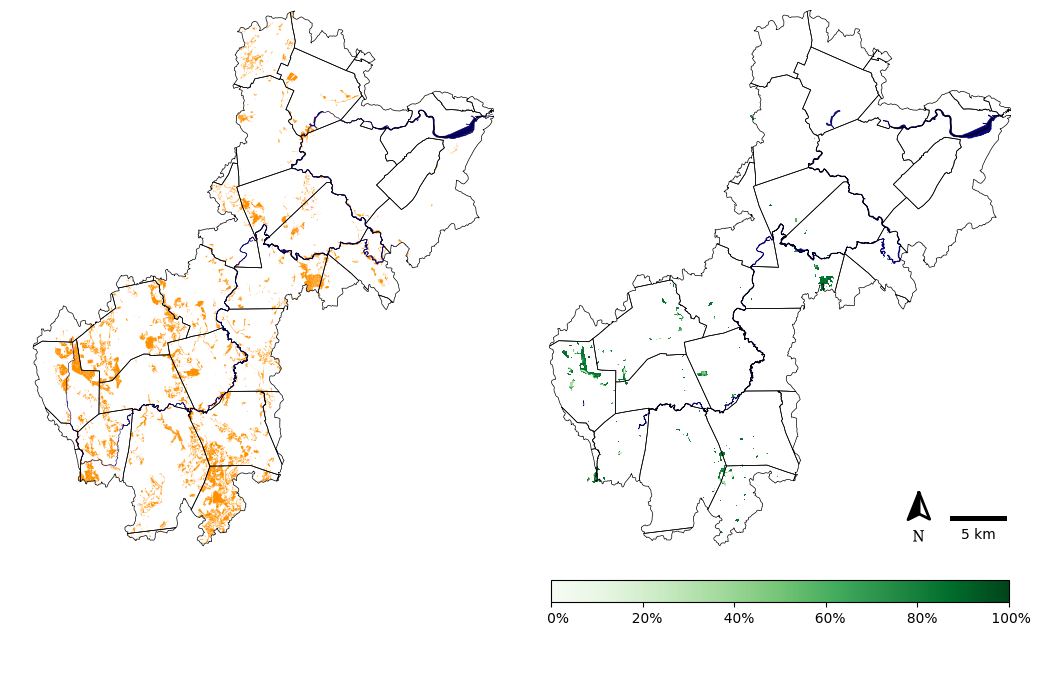

In [92]:
# Show high priority conservation opportunities and tree canopy overall as maps
f, ax = plt.subplots(1,2,figsize=(12,7),layout='tight')

HP_cons_opps.plot(ax=ax[0],color='#ff9101')
towns.boundary.plot(ax=ax[0],color='black',linewidth=0.5)
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax[0],color='#060270',linewidth=0.4)
ax[0].axis('off')
ax[0].set_ylim([852000,911600])

hidden = ax[1].imshow(TCC2021_mask[0,:,:],cmap='Greens',extent=plot_extent,alpha=1,vmin=0,vmax=100)
show(TCC2021_mask,cmap='Greens',ax=ax[1],extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[1], color='black',linewidth=0.5)
Charles.clip(CRW).plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.5)
ax[1].axis('off')
add_north_arrow(ax=ax[1],scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax[1].add_artist(ScaleBar(1,location='lower right'))
f.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05)

f.savefig('Output Maps/2021 TCC conservation prio zones for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [93]:
# Zonal stats on conservation opportunities
HP_cons_opps=HP_cons_opps.dissolve()[['geometry']]
HPCons_stats=pd.DataFrame(rasterstats.zonal_stats(HP_cons_opps, "../../Working_Data/TCC"+'2021'+".tif",stats="count min mean max median"),index=HP_cons_opps.index)

# acreage of trees of interest
HPCons_stats['mean']/100*(HP_cons_opps.geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


0    12231.193518
dtype: float64

In [94]:
# Average canopy coverage (%) for the conservation priority zones
HPCons_stats['mean']

<IPython.core.display.HTML object>


0    67.023526
Name: mean, dtype: float64

In [95]:
# Area of priority zones
HP_cons_opps.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    18249.104962
dtype: float64

In [96]:
# Zonal stats for subcategory of ownership
unk_cons_opp=unk_cons_opp[['geometry']]
HPCons_stats=pd.DataFrame(rasterstats.zonal_stats(unk_cons_opp, "../../Working_Data/TCC"+'2021'+".tif",stats="count min mean max median"),index=unk_cons_opp.index)

# Area of trees
HPCons_stats['mean']/100*(unk_cons_opp.geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


0    154.074721
dtype: float64

In [97]:
# average canopy coverage (%) for unknown ownership priority zones
HPCons_stats['mean']

<IPython.core.display.HTML object>


0    59.703672
Name: mean, dtype: float64

In [98]:
# area of unknown zones
unk_cons_opp.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    258.065737
dtype: float64

In [99]:
# Percent of total zones that are specific ownership type
258/(3394+12651+258)*100

<IPython.core.display.HTML object>

1.5825308225479975

# Export Data

In [358]:
# Tree Canopy
rioxarray.open_rasterio('../../Working_Data/TCC2008.tif', masked=True).rio.to_raster("../../Export_Data/Tree Canopy Coverage 2008.tif")
rioxarray.open_rasterio('../../Working_Data/TCC2021.tif', masked=True).rio.to_raster("../../Export_Data/Tree Canopy Coverage 2021.tif")
rioxarray.open_rasterio('../../Working_Data/dTCCv2.tif', masked=True).rio.to_raster("../../Export_Data/Percent Change in TCC 2008_2021.tif")

<IPython.core.display.HTML object>

In [359]:
# Land Use
gpd.read_file('../../Working_Data/RasterT_landuse1_Cl_Dissolve.shp').to_file('../../Export_Data/CRWA 2021 Land Use_Cleaned.geojson')

<IPython.core.display.HTML object>

In [360]:
# Soils data
gpd.read_file('../../Working_Data/SoilsCRW.shp').to_file('../../Export_Data/Soils data.geojson')

<IPython.core.display.HTML object>

In [361]:
# EJ data with TCC 2021
gpd.read_file('../../Working_Data/EJ TCC.geojson').to_file('../../Export_Data/EJ with Tree Canopy 2021.geojson')

<IPython.core.display.HTML object>

In [362]:
# NELF data
rioxarray.open_rasterio('../../Raw_Data/NELF/rt_01Reprojected.tif', masked=True).rio.to_raster("../../Export_Data/NELF RT20.tif")
rioxarray.open_rasterio('../../Raw_Data/NELF/rt_05Reprojected.tif', masked=True).rio.to_raster("../../Export_Data/NELF RT60.tif")

<IPython.core.display.HTML object>

In [364]:
# Impervious Surface data
rioxarray.open_rasterio('../../Working_Data/NLCD2008.tif', masked=True).rio.to_raster("../../Export_Data/Impervious Surface 2008.tif")
rioxarray.open_rasterio('../../Working_Data/NLCD2021.tif', masked=True).rio.to_raster("../../Export_Data/Impervious Surface 2021.tif")                    

<IPython.core.display.HTML object>

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3106: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  result = runner(coro)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3106: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  result = runner(coro)


In [366]:
# MAPC heat index data
scale=pd.DataFrame(rasterstats.zonal_stats(CRW, "../../Raw_Data/Heat/LST_index_normwater_mapc.tif",stats="count min mean max median"),index=CRW.index)
heat=rioxarray.open_rasterio("../../Raw_Data/Heat/LST_index_normwater_mapc.tif")
heat=heat.rio.clip(CRW.geometry)
heat=vectorize(heat.astype('float32'))
heat['_data']=(heat['_data']-scale['min'][0])/(scale['max'][0]-scale['min'][0])
heat.to_file('../../Export_Data/MAPC_heat_CRW_rescaled.geojson')

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\geocube\vector.py:62: UserWarning: The array has no name. Column name defaults to _data
  warnings.warn("The array has no name. Column name defaults to _data")


In [367]:
# Open space data
OS=gpd.read_file('../../Raw_Data/OpenSpace/OPENSPACE_POLY.shp').clip(CRW)
OS.loc[30889,'OWNER_TYPE']='F'
OS[OS.SITE_NAME=='Upper Charles River Rail Trail'].loc['OWNER_TYPE']='M'
OS.to_file('../../Export_Data/Open Space July 2024.geojson')

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
C:\Users\Chad\AppData\Local\Temp\ipykernel_6572\3995057900.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate obje

In [370]:
# Parcel data with missing data added back in as unknown
gpd.read_file('../../Working_Data/Parcels 2024_corrected.shp').to_file('../../Export_Data/Parcels 2024_corrected.shp')

<IPython.core.display.HTML object>

In [371]:
# Ordinance data
Ords=Charles_Towns.sort_values(by='name')
Ords=Ords.merge(pd.read_csv('../../Raw_Data/Tree Bylaw Review_Watershedwide - NEW.csv'),left_on='name',right_on='Town')
Ords.to_file('../../Export_Data/Tree Ordinances July 2024.geojson')

<IPython.core.display.HTML object>

In [372]:
# NVSA data
gpd.read_file('../../Raw_Data/NVSA V2/naturalvalleystoragewetlands.shp').to_crs(epsg=26986).to_file('../../Export_Data/NVSA_full.geojson')

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore

In [373]:
# BioMap3 data
gpd.read_file('../../Raw_Data/BioMAP/BM3_CORE_HABITAT.shp').clip(CRW).to_file('../../Export_Data/BM3 Core Habitat.geojson')
gpd.read_file('../../Raw_Data/BioMAP/BM3_CRITICAL_NATURAL_LANDSCAPE.shp').clip(CRW).to_file('../../Export_Data/BM3 Critical Natural Landscapes.geojson')
gpd.read_file('../../Raw_Data/BioMAP/BM3_CH_FOREST_CORE.shp').clip(CRW).to_file('../../Export_Data/BM3 Forest Core.geojson')
gpd.read_file('../../Raw_Data/BioMAP/BM3_LOCAL_LANDSCAPES.shp').clip(CRW).to_file('../../Export_Data/BM3 Local Landscapes.geojson')

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:194: RuntimeWarning: driver ESRI Shapefile does not support open option DRIVER
  result = ogr_read(
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:194: RuntimeWarning: driver ESRI Shapefile does not support open option DRIVER
  result = ogr_read(
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:194: RuntimeWarning: driver ESRI Shapefile does not support open option DRIVER
  result = ogr_read(
C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:194: RuntimeWarning: driver ESRI Shapefile does not support open option DRIVER
  result = ogr_read(


In [374]:
# Areas of protected canopy
gpd.read_file('../../Working_Data/Protect All Areas.geojson').to_file('../../Export_Data/All Areas of Protected Canopy.geojson')

<IPython.core.display.HTML object>

In [375]:
# TNC High Priority Conservation Areas
cons_opps=gpd.read_file('../../Raw_Data/TNC_Cons/High Level Conservation Opp/High Priority Conservation Opportunities/High Priority Conservation Opportunities.shp').to_crs(epsg=26986)
cons_opps[cons_opps.Priority=='High Priority'].to_file('../../Export_Data/High Priority Conservation Opportunities.geojson')

<IPython.core.display.HTML object>